<a href="https://colab.research.google.com/github/isaacchunn/SC1015_MiniPrj_Airbnb/blob/main/Airbnb_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset : Airbnb Singapore Dataset from InsideAirbnb
#### Question : If we were an AirBnb host, how can we maximise our profit?


Dataset from Airbnb : **"Singapore, 29 December 2022"**  
Source: http://insideairbnb.com/get-the-data/


---
# Contents
  1. Preparation of data
  2. Linear Regression
    * On all features
    * host_response_time
    * neighbourhood_cleansed
    * neighbourhood_group_cleansed
    * property_type
    * accommodates
    * amenities/no_amenities
    * number_of_reviews
  3. Ridge Regression with Cross Validation
  4. Lasso Regression with Cross Validation
  5. Gradient Booster (Non Linear Regression)
  6. XGBoost (Non Linear Regression)
  7. Plotting of accuracy of all methods
  8. Summary of best regression model

---

### Essential Libraries

Import essential libraries such as numpy, pandas, matplotlib and seaborn.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [2102]:
# Isaac Chun Jun Heng U2221389B
# J'sen Ong Jia Xuan  U2220457J
# Tang Teck Meng U2221809C

In [2103]:
#Basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt #We only need pyplot
sb.set() #Set the default Seaborn style for graphics

### Additional Libraries

Import additional libraries

> sklearn : Conduct linear regression analysis

In [2104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Declare our random state

In [2105]:
random_state = 96

### General Utility Functions

In [2106]:
def countOutliers (df):
    #Get the q1 and q3 datas to find out the 25% and 75% range, then calculate inter quartile range and then find out whiskers.
    #Then count how many points lie outside of this range.
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    #Interquartile
    iqr = q3 - q1
    #Calculate whiskers
    leftWhisker = q1 - (1.5 * iqr)
    rightWhisker = q3 + (1.5 * iqr)
    outliers = 0;
    #Loop through data now
    for data in df:
        if(data < leftWhisker or data > rightWhisker):
            outliers+=1

    return outliers

In [2107]:
def removeOutliers(df, colName):
  q1 = df[colName].quantile(0.25)
  q3 = df[colName].quantile(0.75)
  iqr = q3-q1
  low = q1 - 1.5 * iqr
  high = q3 + 1.5 * iqr
  result = df.loc[(df[colName] >= low) & (df[colName] <= high)]
  return result

In [2108]:
def remove_outliers(df, columns, factor=1.5):
    # loop through each column and remove outliers based on the IQR method
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + factor * iqr
        lower_bound = q1 - factor * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [2109]:
#Define a regression func to easily calculate regression among two variables
def calcLinRegression(predictor, response, testSize = 0.2, solidLine = False, f_size = (20,10), xTitle = None, yTitle = None):

    #Get the appropriate data from train and put them in DF!
    #Check if the inputs are valid
    if (predictor is None or response is None):
        print("Invalid input into regression function")
        return
     
    #Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor,response, test_size = testSize, random_state = random_state)

    #Then calculate the linear regression using train data
    linreg = LinearRegression();
    linreg.fit(X_train, y_train);

    #Print Coefficients of the Linear Regression line
    print("Regression intercept \t\t: b = ", linreg.intercept_)
    print("Regression coefficients \t: a = ",linreg.coef_)

    #Predict the values corresponding to the predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    #Print the mean squared and root mean squared error on the train data set
    #Also print goodness of fit.
    print("-------------------------------")
    print("Goodness of Fit (Train)")
    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    mseTrain =  mean_squared_error(X_train, y_train_pred)
    print("Mean Squared Error (MSE)\t:", mseTrain)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseTrain))

    #Print the mean squared and root mean squared error on the test data set
    #Also print goodness of fit.
    print("-------------------------------")
    print("Goodness of Fit (Test)")
    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    mseTrain =  mean_squared_error(X_test, y_test_pred)
    print("Mean Squared Error (MSE)\t:", mseTrain)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseTrain))

    #Plot the regression line
    f = plt.figure(figsize = f_size)
    plt.scatter(X_train, y_train)
    if xTitle:
      plt.xlabel(xTitle)
    if yTitle:
      plt.ylabel(yTitle)
    if solidLine:
        plt.plot(X_train,y_train_pred,'r-', linewidth = 2)
    else:
        plt.scatter(X_train, y_train_pred, color = "r")
    print()

    #Then return a tuple of the predictions
    return (y_test, y_train_pred, y_test_pred)

In [2110]:
def calcLinRegressionCategorical(response, predictor, testSize = 0.2):
  # Split the Dataset into Train and Test
  X_train, X_test, y_train, y_test = train_test_split(response, predictor, test_size = testSize, random_state = random_state)

  # fit model
  linreg = LinearRegression()
  linreg.fit(X_train, y_train)

  # predict
  y_train_pred = linreg.predict(X_train)

  # Goodness of Fit for Train Data
  print("Goodness of Fit of Model \tTrain Dataset")
  print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
  print("Mean Squared Error (MSE) \t:",
        mean_squared_error(y_train, y_train_pred))
  print("Root Mean Squared Error (RMSE) \t:",
        np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print()

  # Accuracy for Test Data
  y_test_pred = linreg.predict(X_test)
  print("Accuracy of Model        \tTest Dataset")
  print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
  print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
  print("Root Mean Squared Error (RMSE) \t:",
        np.sqrt(mean_squared_error(y_test, y_test_pred)))
  print()
  return y_train, y_train_pred, y_test, y_test_pred

### Mount Google Drive (unused, uncomment if need add anything from google drive.)

In [2111]:
# from google.colab import drive 
# drive.mount('/content/gdrive')

---

>## Hypothesis  

1. The number of amenities a listing provides will affect its price, the more the amenities, the higher the listing price
2. Variables related to a listing's review will have positive correlation to listing's price

---

>## Import the Dataset  

We have imported the cleaned dataset based on our EDA done in the other files.

In [2112]:
url = "https://raw.githubusercontent.com/isaacchunn/SC1015_MiniPrj_Airbnb/main/listings_cleaned.csv"
airDF = pd.read_csv(url)
airDF.head()

name  \
0        Ensuite Room (Room 1 & 2) near EXPO   
1            B&B  Room 1 near Airport & EXPO   
2                 Room 2-near Airport & EXPO   
3  Amazing Room with window 10min to Redhill   
4          15 mins to Outram MRT Single Room   

                           listing_url  \
0   https://www.airbnb.com/rooms/71609   
1   https://www.airbnb.com/rooms/71896   
2   https://www.airbnb.com/rooms/71903   
3  https://www.airbnb.com/rooms/275343   
4  https://www.airbnb.com/rooms/275344   

                                         description  \
0  For 3 rooms.Book room 1&2 and room 4<br /><br ...   
1  <b>The space</b><br />Vocational Stay Deluxe B...   
2  Like your own home, 24hrs access.<br /><br /><...   
3  Awesome location and host <br />Room near INSE...   
4  Lovely home for the special guest !<br /><br /...   

                               neighborhood_overview  host_response_time  \
0                                                NaN  within a few hours   
1                                                NaN  within a few hours   
2  Quiet and view of the playground with exercise...  within a few hours   
3                                                NaN      within an hour   
4       Bus stop <br />Food center <br />Supermarket      within an hour   

  host_response_rate host_acceptance_rate neighbourhood_cleansed  \
0                90%                 100%               Tampines   
1                90%                 100%               Tampines   
2                90%                 100%               Tampines   
3               100%                  85%            Bukit Merah   
4               100%                  85%            Bukit Merah   

  neighbourhood_group_cleansed  latitude  ...  number_of_reviews  \
0                  East Region   1.34537  ...               20.0   
1                  East Region   1.34754  ...               24.0   
2                  East Region   1.34531  ...               47.0   
3               Central Region   1.29015  ...               22.0   
4               Central Region   1.28836  ...               14.0   

  review_scores_rating  review_scores_accuracy review_scores_cleanliness  \
0                 4.44                    4.37                      4.00   
1                 4.16                    4.22                      4.09   
2                 4.41                    4.39                      4.52   
3                 4.40                    4.16                      4.26   
4                 4.50                    4.69                      4.23   

  review_scores_checkin  review_scores_communication  review_scores_location  \
0                  4.63                         4.78                    4.26   
1                  4.43                         4.43                    4.17   
2                  4.63                         4.64                    4.50   
3                  4.47                         4.42                    4.53   
4                  4.62                         4.54                    4.62   

   review_scores_value  license  instant_bookable  
0                 4.32      NaN                 f  
1                 4.04      NaN                 t  
2                 4.36      NaN                 f  
3                 4.63    S0399                 f  
4                 4.46    S0399                 f  

[5 rows x 27 columns]

In [2113]:
airDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          3035 non-null   object 
 1   listing_url                   3035 non-null   object 
 2   description                   2968 non-null   object 
 3   neighborhood_overview         1968 non-null   object 
 4   host_response_time            2405 non-null   object 
 5   host_response_rate            2405 non-null   object 
 6   host_acceptance_rate          2284 non-null   object 
 7   neighbourhood_cleansed        3018 non-null   object 
 8   neighbourhood_group_cleansed  3018 non-null   object 
 9   latitude                      3018 non-null   float64
 10  longitude                     3018 non-null   float64
 11  property_type                 3018 non-null   object 
 12  accommodates                  3018 non-null   float64
 13  ame

In [2114]:
print(airDF.dtypes)

name                             object
listing_url                      object
description                      object
neighborhood_overview            object
host_response_time               object
host_response_rate               object
host_acceptance_rate             object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
accommodates                    float64
amenities                        object
price                            object
minimum_nights                  float64
maximum_nights                  float64
number_of_reviews               float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64


---

>## Cleaning our DataFrame/Dataset

### 1. Drop properties with N/A or 0% acceptance rate as these properties do not get stayed at by visitors.

In [2115]:
#Drop all the properties that has no host acceptance rate then drop
airDF = airDF.dropna(subset=["host_acceptance_rate"])
#Then remove all the 0% acceptance rate
airDF = airDF[airDF["host_acceptance_rate"] != 0]
#Resort our indexes
airDF = airDF.reset_index(drop=True)
airDF.head(n=5)

name  \
0        Ensuite Room (Room 1 & 2) near EXPO   
1            B&B  Room 1 near Airport & EXPO   
2                 Room 2-near Airport & EXPO   
3  Amazing Room with window 10min to Redhill   
4          15 mins to Outram MRT Single Room   

                           listing_url  \
0   https://www.airbnb.com/rooms/71609   
1   https://www.airbnb.com/rooms/71896   
2   https://www.airbnb.com/rooms/71903   
3  https://www.airbnb.com/rooms/275343   
4  https://www.airbnb.com/rooms/275344   

                                         description  \
0  For 3 rooms.Book room 1&2 and room 4<br /><br ...   
1  <b>The space</b><br />Vocational Stay Deluxe B...   
2  Like your own home, 24hrs access.<br /><br /><...   
3  Awesome location and host <br />Room near INSE...   
4  Lovely home for the special guest !<br /><br /...   

                               neighborhood_overview  host_response_time  \
0                                                NaN  within a few hours   
1                                                NaN  within a few hours   
2  Quiet and view of the playground with exercise...  within a few hours   
3                                                NaN      within an hour   
4       Bus stop <br />Food center <br />Supermarket      within an hour   

  host_response_rate host_acceptance_rate neighbourhood_cleansed  \
0                90%                 100%               Tampines   
1                90%                 100%               Tampines   
2                90%                 100%               Tampines   
3               100%                  85%            Bukit Merah   
4               100%                  85%            Bukit Merah   

  neighbourhood_group_cleansed  latitude  ...  number_of_reviews  \
0                  East Region   1.34537  ...               20.0   
1                  East Region   1.34754  ...               24.0   
2                  East Region   1.34531  ...               47.0   
3               Central Region   1.29015  ...               22.0   
4               Central Region   1.28836  ...               14.0   

  review_scores_rating  review_scores_accuracy review_scores_cleanliness  \
0                 4.44                    4.37                      4.00   
1                 4.16                    4.22                      4.09   
2                 4.41                    4.39                      4.52   
3                 4.40                    4.16                      4.26   
4                 4.50                    4.69                      4.23   

  review_scores_checkin  review_scores_communication  review_scores_location  \
0                  4.63                         4.78                    4.26   
1                  4.43                         4.43                    4.17   
2                  4.63                         4.64                    4.50   
3                  4.47                         4.42                    4.53   
4                  4.62                         4.54                    4.62   

   review_scores_value  license  instant_bookable  
0                 4.32      NaN                 f  
1                 4.04      NaN                 t  
2                 4.36      NaN                 f  
3                 4.63    S0399                 f  
4                 4.46    S0399                 f  

[5 rows x 27 columns]

### 2. Clean the price column using code as it has "$", "," and "." 


In [2116]:
airDF["price"]

0       $46,437.00 
1           $81.00 
2           $81.00 
3           $52.00 
4           $49.00 
           ...     
2279        $45.00 
2280        $45.00 
2281       $186.00 
2282       $797.00 
2283       $434.00 
Name: price, Length: 2284, dtype: object

In [2117]:
breaks = [",", "$"]
for i in range(len(airDF["price"])):
    s = airDF.loc[:,("price")][i]
    for x in breaks:
        s = s.replace(x,"")
    s = "".join(s.split(".")[:-1])
    airDF.loc[:,("price")][i] = int(s)
airDF = airDF.astype({'price': 'int32'})

<ipython-input-2117-e0f04e7ead66>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF.loc[:,("price")][i] = int(s)


We also remove any outliers as it is unrealistic for a property to have above > $45,000 per night

In [2118]:
airDF = remove_outliers(airDF, ["price"])
airDF = airDF[airDF.price < 350]
#Resort our indexes
airDF = airDF.reset_index(drop=True)
airDF["price"]

0        81
1        81
2        52
3        49
4       175
       ... 
1746     45
1747     45
1748     45
1749     45
1750    186
Name: price, Length: 1751, dtype: int32

In [2119]:
airDF["property_type"]

0              Private room in home
1              Private room in home
2       Private room in rental unit
3       Private room in rental unit
4              Private room in home
                   ...             
1746          Shared room in hostel
1747          Shared room in hostel
1748          Shared room in hostel
1749      Shared room in guesthouse
1750         Private room in hostel
Name: property_type, Length: 1751, dtype: object

In [2120]:
#Classify according to their first word up to the space
count = 0
for x in airDF["property_type"]:
    #Split this
    s = airDF["property_type"].iloc[count].split(" ", 1)[0]
    if s == "Private":
      s = "Private room"
    elif s == "Entire":
      s = "Entire home/apt"
    elif s == "Room":
      s= "Hotel/Hostel"
    elif s == "Shared":
      s= "Shared room"
    airDF["property_type"].iloc[count] = s
    count += 1
#we print out the values to check if its cleaned properly
airDF["property_type"]

<ipython-input-2120-95909aa8827a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["property_type"].iloc[count] = s


0       Private room
1       Private room
2       Private room
3       Private room
4       Private room
            ...     
1746     Shared room
1747     Shared room
1748     Shared room
1749     Shared room
1750    Private room
Name: property_type, Length: 1751, dtype: object

### 3. Convert the amenities column to a list, and add a new column with the number of amenities to be used for our prediction.

In [2121]:
airDF["amenities"]

0       ["Cooking basics", "Refrigerator", "Kitchen", ...
1       ["Cooking basics", "Heating", "Kitchen", "Hair...
2       ["Air conditioning", "Shampoo", "Smoke alarm",...
3       ["Air conditioning", "Shampoo", "Smoke alarm",...
4       ["Cooking basics", "Kitchen", "Private entranc...
                              ...                        
1746    ["Air conditioning", "Fire extinguisher", "Sec...
1747    ["Air conditioning", "Fire extinguisher", "Sec...
1748    ["Air conditioning", "Fire extinguisher", "Sec...
1749    ["Air conditioning", "Fire extinguisher", "Sec...
1750    ["Air conditioning", "Fire extinguisher", "Sec...
Name: amenities, Length: 1751, dtype: object

In [2122]:
#Add a new column of amenities
airDF["no_amenities"] = 0
#Replace all with the integer variant
count = 0
for x in airDF["amenities"]:   
    #Convert string into list
    #Convert string into list
    x = x.replace('[',"")
    x = x.replace(']',"")
    x = x.replace('"', "")
    x = x.replace(", ", ",")
    x = x.split(",")
    airDF["amenities"][count] = x
    airDF["no_amenities"][count] = len(x)
    count += 1

<ipython-input-2122-a56617251945>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["amenities"][count] = x
<ipython-input-2122-a56617251945>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["no_amenities"][count] = len(x)


In [2123]:
airDF["amenities"].head(n=5)

0    [Cooking basics, Refrigerator, Kitchen, Hair d...
1    [Cooking basics, Heating, Kitchen, Hair dryer,...
2    [Air conditioning, Shampoo, Smoke alarm, Long ...
3    [Air conditioning, Shampoo, Smoke alarm, Long ...
4    [Cooking basics, Kitchen, Private entrance, Ha...
Name: amenities, dtype: object

In [2124]:
airDF["no_amenities"].head(n=5)

0    31
1    26
2    17
3    18
4    32
Name: no_amenities, dtype: int64

In [2125]:
#Want to visualize the total count of amenities so we can form a generalization such that our number of amenities remains reliable.
amenityCount = {}
for x in airDF["amenities"]:
    for item in x:
        if item in amenityCount:
            amenityCount[item] += 1
        else:
            amenityCount[item] = 1
        
#Add it to a DF
amenityCountDF = pd.DataFrame(columns = ["amenity", "count"])
count = 0
for keys, values in amenityCount.items():
    amenityCountDF.loc[count] = [keys, values]
    count += 1

#Sort the DF
amenityCountDF = amenityCountDF.sort_values(by="count", ascending = False)
amenityCountDF.head(n=15)

amenity  count
9   Long term stays allowed   1746
7                      Wifi   1702
32         Air conditioning   1611
17               Essentials   1503
2                   Kitchen   1426
43                  Hangers   1387
30                   Washer   1356
39                     Iron   1325
26                Hot water   1233
3                Hair dryer   1153
1              Refrigerator   1079
10                    Dryer   1070
35                Microwave    981
6                        TV    980
36    Dishes and silverware    946

In [2126]:
amenityCountDF.tail(n=10)

amenity  count
259                       Backyard - Not fully fenced      1
257                          HDTV with standard cable      1
179                    Stainless steel electric stove      1
255  Paid parking garage on premises \u2013 20 spaces      1
253              Private outdoor pool - olympic-sized      1
183                               Wifi \u2013 22 Mbps      1
250                               BBQ grill: electric      1
249                   Coffee maker: drip coffee maker      1
184                             Hitachi  refrigerator      1
335                                  Fireplace guards      1

We have decided to only use those amenities that are very prominent in most of the listings as the number of amenities should be consistent, and not be filled with many values that do not matter. For example, we do not know what Fire TV is.

In [2127]:
#Changeable cutoff that are determined by us to check for robustness of our model
amenityCutOff = 30

In [2128]:
uselessAmenityList = amenityCountDF[amenityCountDF["count"] <= amenityCutOff]["amenity"].values.tolist()

In [2129]:
#Remove all values in our df that correspond to our useless amenity list
count = 0
for x in airDF["amenities"]:
    l = [i for i in x if i not in uselessAmenityList]
    airDF["amenities"][count] = l
    airDF["no_amenities"][count] = len(l)
    count +=1

<ipython-input-2129-ae78827c68ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["amenities"][count] = l
<ipython-input-2129-ae78827c68ad>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["no_amenities"][count] = len(l)


### 4. Fill in na values in host_response_time to be a value as we are using it to gather insights

In [2130]:
print("Null values:", airDF["host_response_time"].isnull().sum().sum())

Null values: 87


In [2131]:
airDF["host_response_time"].value_counts()

within an hour        642
within a few hours    577
within a day          355
a few days or more     90
Name: host_response_time, dtype: int64

In [2132]:
#Fill it to be the worst scenario to achieve better distribution
airDF = airDF.fillna(value = {"host_response_time": "a few days or more"})
None

In [2133]:
print("Null values:", airDF["host_response_time"].isnull().sum().sum())

Null values: 0


In [2134]:
airDF["host_response_time"].value_counts()

within an hour        642
within a few hours    577
within a day          355
a few days or more    177
Name: host_response_time, dtype: int64

---

>## Splitting the Dataset

In [2135]:
#Split the dataset into train and test in 80:20 ratio
train_data, test_data = train_test_split(airDF, test_size = 0.2, random_state = 55)

#Print out what we have in our test and train data
print("Train Data :")
print("Data type : ", type(train_data))
print("Data dim : ", train_data.shape)
print("---------------------------------------")
print("Test Data :")
print("Data type : ", type(test_data))
print("Data dim : ", test_data.shape)
print("---------------------------------------")

Train Data :
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dim :  (1400, 28)
---------------------------------------
Test Data :
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dim :  (351, 28)
---------------------------------------


---
### One - hot encoding all the potential categorical variables !


In [2136]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#we will exclude amenities since that feature requires individual data cleaning
potentialFeaturesDF = pd.DataFrame(airDF[["host_response_time","neighbourhood_cleansed","neighbourhood_group_cleansed","property_type", "accommodates", "number_of_reviews", "no_amenities"]])

#pull out all the categorical variables into airbnb_cat DF
cat_variables = ['host_response_time', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type']
airbnb_cat = potentialFeaturesDF[cat_variables]

#OHE airbnb_cat categorical predictors
ohe.fit(airbnb_cat)
airbnb_cat_ohe = pd.DataFrame(ohe.transform(airbnb_cat).toarray(),
                             columns=ohe.get_feature_names_out(airbnb_cat.columns))

airbnb_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 49 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   host_response_time_a few days or more           1751 non-null   float64
 1   host_response_time_within a day                 1751 non-null   float64
 2   host_response_time_within a few hours           1751 non-null   float64
 3   host_response_time_within an hour               1751 non-null   float64
 4   neighbourhood_cleansed_Ang Mo Kio               1751 non-null   float64
 5   neighbourhood_cleansed_Bedok                    1751 non-null   float64
 6   neighbourhood_cleansed_Bishan                   1751 non-null   float64
 7   neighbourhood_cleansed_Bukit Batok              1751 non-null   float64
 8   neighbourhood_cleansed_Bukit Merah              1751 non-null   float64
 9   neighbourhood_cleansed_Bukit Panjang     

In [2137]:
#Driver code to find all the categories that are numerical
numerical_variables = []
for i in potentialFeaturesDF:
    if i not in cat_variables:
        numerical_variables.append(i)
numerical_variables

['accommodates', 'number_of_reviews', 'no_amenities']

In [2138]:
# Combining Numeric features with the OHE Categorical features
airbnb_num = potentialFeaturesDF[numerical_variables]
airbnbData_ohe = pd.concat([airbnb_num , airbnb_cat_ohe],sort=False,axis=1).reindex(index=airbnb_num.index)

# Check the final dataframe
airbnbData_ohe

accommodates  number_of_reviews  no_amenities  \
0              1.0               24.0            27   
1              2.0               47.0            23   
2              1.0               22.0            17   
3              1.0               14.0            18   
4              4.0               12.0            30   
...            ...                ...           ...   
1746           1.0                0.0             8   
1747           1.0                0.0             8   
1748           1.0                0.0             8   
1749           1.0                0.0             8   
1750           4.0                0.0             8   

      host_response_time_a few days or more  host_response_time_within a day  \
0                                       0.0                              0.0   
1                                       0.0                              0.0   
2                                       0.0                              0.0   
3                                       0.0                              0.0   
4                                       0.0                              0.0   
...                                     ...                              ...   
1746                                    0.0                              0.0   
1747                                    0.0                              0.0   
1748                                    0.0                              0.0   
1749                                    0.0                              0.0   
1750                                    0.0                              0.0   

      host_response_time_within a few hours  \
0                                       1.0   
1                                       1.0   
2                                       0.0   
3                                       0.0   
4                                       1.0   
...                                     ...   
1746                                    0.0   
1747                                    0.0   
1748                                    0.0   
1749                                    0.0   
1750                                    0.0   

      host_response_time_within an hour  neighbourhood_cleansed_Ang Mo Kio  \
0                                   0.0                                0.0   
1                                   0.0                                0.0   
2                                   1.0                                0.0   
3                                   1.0                                0.0   
4                                   0.0                                0.0   
...                                 ...                                ...   
1746                                1.0                                0.0   
1747                                1.0                                0.0   
1748                                1.0                                0.0   
1749                                1.0                                0.0   
1750                                1.0                                0.0   

      neighbourhood_cleansed_Bedok  neighbourhood_cleansed_Bishan  ...  \
0                              0.0                            0.0  ...   
1                              0.0                            0.0  ...   
2                              0.0                            0.0  ...   
3                              0.0                            0.0  ...   
4                              0.0                            0.0  ...   
...                            ...                            ...  ...   
1746                           0.0                            0.0  ...   
1747                           0.0                            0.0  ...   
1748                           0.0                            0.0  ...   
1749                           0.0                            0.0  ...   
1750                           0.0                            0.0  .

Graph plotting function

In [2139]:
def plotActualPred(y_train, y_train_pred, y_test, y_test_pred, trainTitle, testTitle, figSize = (20,20)):
    #Set up our axes 
    f, axes = plt.subplots(1,2, figsize=figSize)
    train_plot_df = pd.concat([pd.DataFrame(y_train, columns=['price']), pd.DataFrame(y_train_pred, columns=['price_pred'])], axis=1, join='inner')
    train_plot_df.sort_values(by=['price'], inplace=True)
    train_plot_df.reset_index(inplace=True, drop=True)
    trainplot = sb.lineplot(data=train_plot_df, ax = axes[0])
    if trainTitle:
        trainplot.set_title(trainTitle)

    #handle test graph
    test_plot_df = pd.concat([pd.DataFrame(y_test, columns=['price']), pd.DataFrame(y_test_pred, columns=['price_pred'])], axis=1, join='inner')
    test_plot_df.sort_values(by=['price'], inplace=True)
    test_plot_df.reset_index(inplace=True, drop=True)
    testplot = sb.lineplot(data=test_plot_df, ax = axes[1])
    if testTitle:
        testplot.set_title(testTitle)


---

# 1. Linear Regression 

In [2140]:
priceDF = airDF["price"]
priceDF.head(n=5)

0     81
1     81
2     52
3     49
4    175
Name: price, dtype: int32

---
##1a) All features vs price

In [2141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe.drop(numerical_variables, axis=1))
y_train, y_train_pred, y_test, y_test_pred = calcLinRegressionCategorical(X,y,0.2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6119624549809248
Mean Squared Error (MSE) 	: 2760.0737932477678
Root Mean Squared Error (RMSE) 	: 52.53640445679327

Accuracy of Model        	Test Dataset
Explained Variance (R^2) 	: 0.5575450560812452
Mean Squared Error (MSE) 	: 3067.0093030793714
Root Mean Squared Error (RMSE) 	: 55.38058597630916



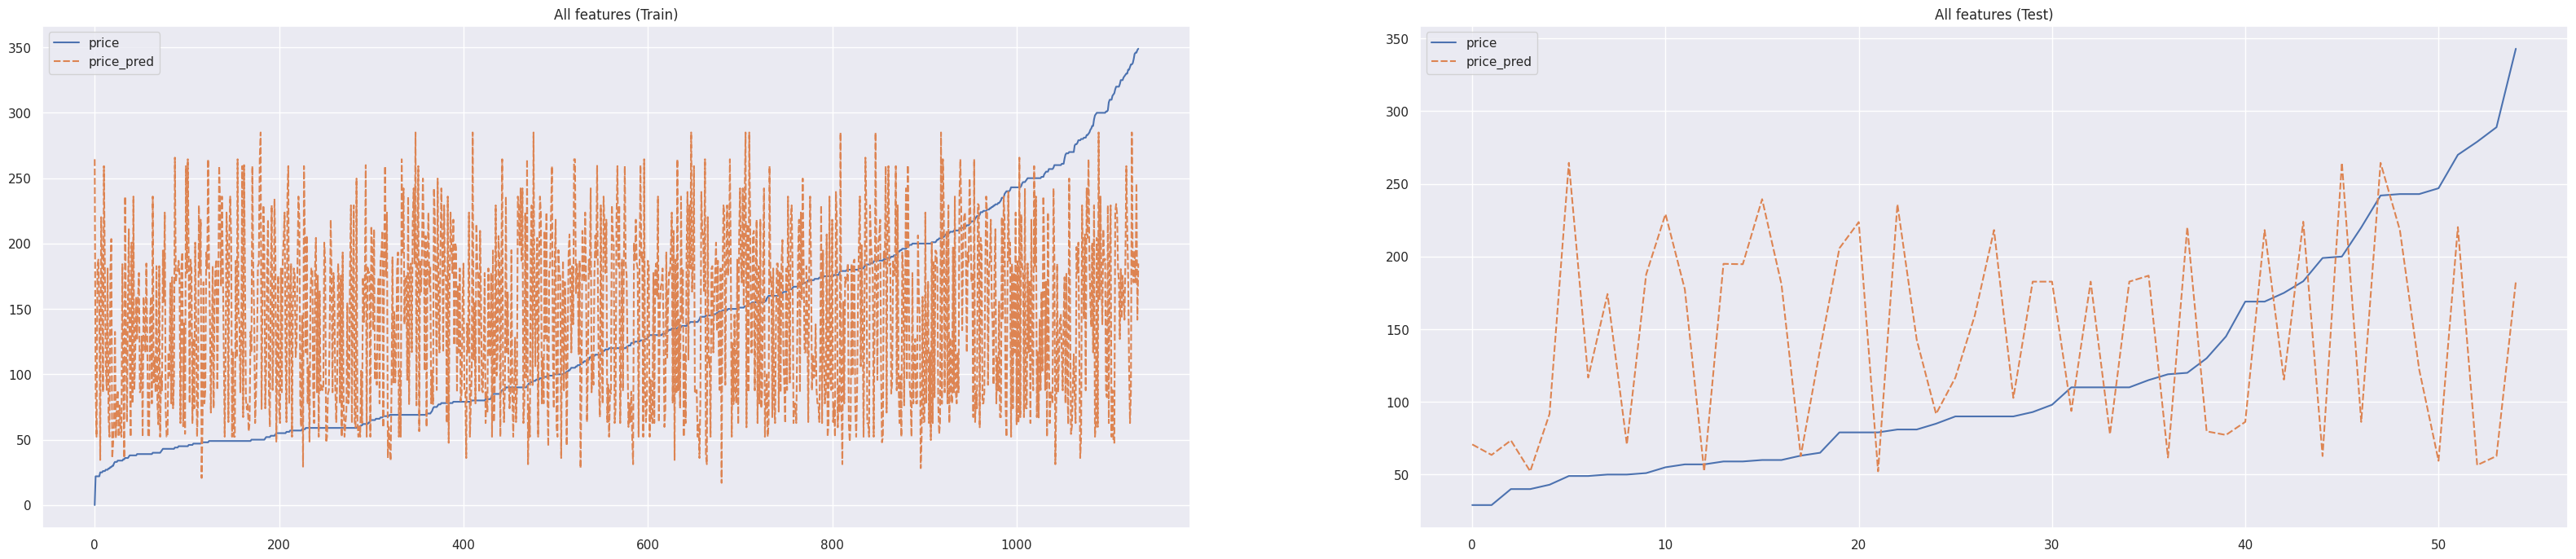

In [2142]:
#Plot the results of our fit
plotActualPred(y_train, y_train_pred, y_test, y_test_pred, "All features (Train)", "All features (Test)", figSize = (40,8))

###Analysis: All features vs price


*   Eventhough the explained variance is relatively low, we can see that explained variance for both train and test models are relatively similar(0.3) this suggest that the model is able to explain some of the varability in the response.
*   The test graph shows that there is extreme predictions for certain features.



---
## 1b) host_response_time vs price 

In [2143]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'host_response_time' in col]])
y_train, y_train_pred, y_test, y_test_pred = calcLinRegressionCategorical(X,y,0.2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.08480710238106459
Mean Squared Error (MSE) 	: 6509.679191894531
Root Mean Squared Error (RMSE) 	: 80.6825829525464

Accuracy of Model        	Test Dataset
Explained Variance (R^2) 	: 0.13299916957725
Mean Squared Error (MSE) 	: 6009.876596999644
Root Mean Squared Error (RMSE) 	: 77.5233938692034



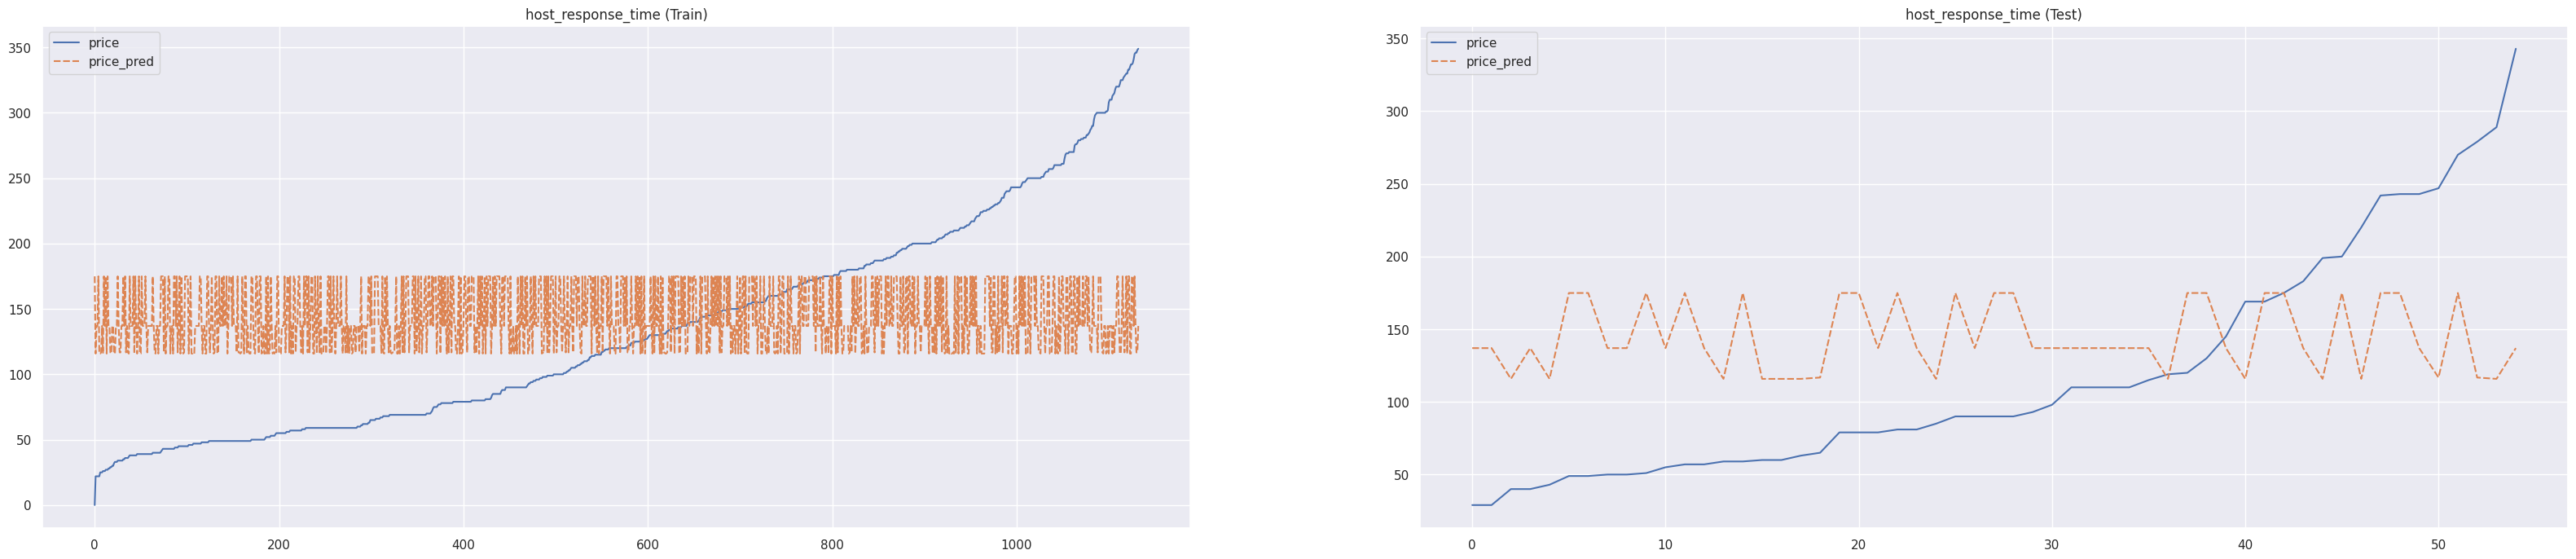

In [2144]:
#Plot the results of our fit
plotActualPred(y_train, y_train_pred, y_test, y_test_pred, "host_response_time (Train)", "host_response_time (Test)", figSize = (40,8))

### Analysis: host_response_time vs price



*   Explained variance of 0 suggests that the model is not able to explain any of the variability in the response. 
*   We will explore other variables



---
## 1c) neighbourhood_cleansed vs price

In [2145]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'neighbourhood_cleansed' in col]])
y_train, y_train_pred, y_test, y_test_pred = calcLinRegressionCategorical(X,y,0.2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3030105319992846
Mean Squared Error (MSE) 	: 4957.619151785714
Root Mean Squared Error (RMSE) 	: 70.410362531276

Accuracy of Model        	Test Dataset
Explained Variance (R^2) 	: 0.1833307592404354
Mean Squared Error (MSE) 	: 5660.98806980057
Root Mean Squared Error (RMSE) 	: 75.23953794249782



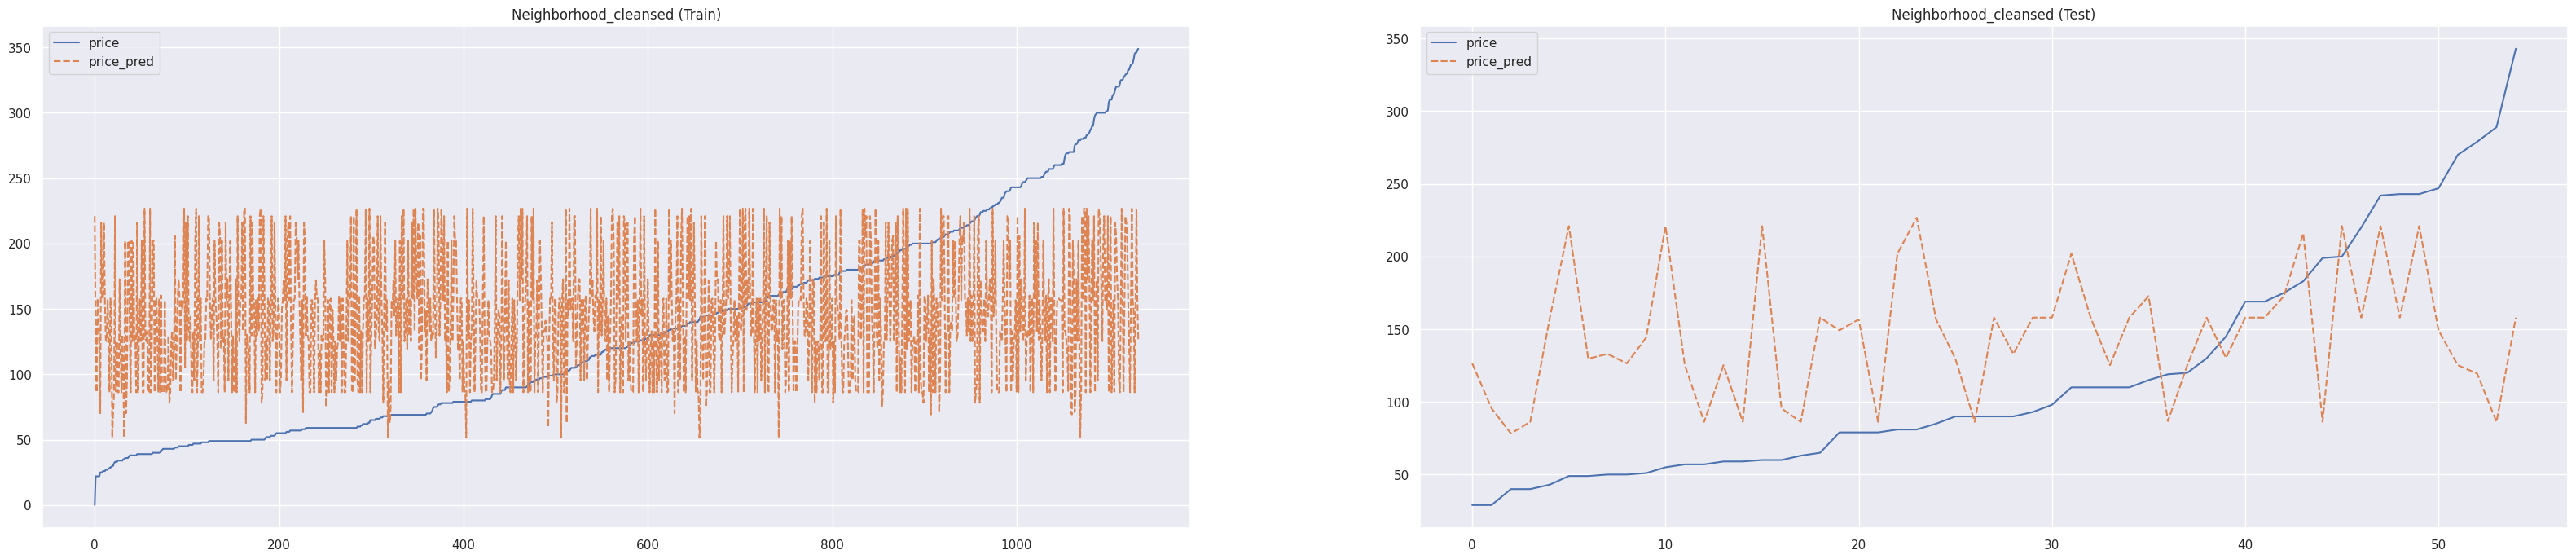

In [2146]:
#Plot the results of our fit
plotActualPred(y_train, y_train_pred, y_test, y_test_pred, "Neighborhood_cleansed (Train)", "Neighborhood_cleansed (Test)", figSize = (40,8))

### Analysis: neighbourhood_cleansed vs price


1.   with both models having an explained variance of 0.2 signifies that just using neighbourhood is not good enough for our problem statement
2.   We will explore other variables



---
## 1d) neighbourhood_group_cleansed vs price

In [2147]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'neighbourhood_group_cleansed_' in col]])
y_train, y_train_pred, y_test, y_test_pred = calcLinRegressionCategorical(X,y,0.2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.024008609130483638
Mean Squared Error (MSE) 	: 6942.133035714286
Root Mean Squared Error (RMSE) 	: 83.31946372675647

Accuracy of Model        	Test Dataset
Explained Variance (R^2) 	: -0.013977183482237532
Mean Squared Error (MSE) 	: 7028.687321937322
Root Mean Squared Error (RMSE) 	: 83.83726690402855



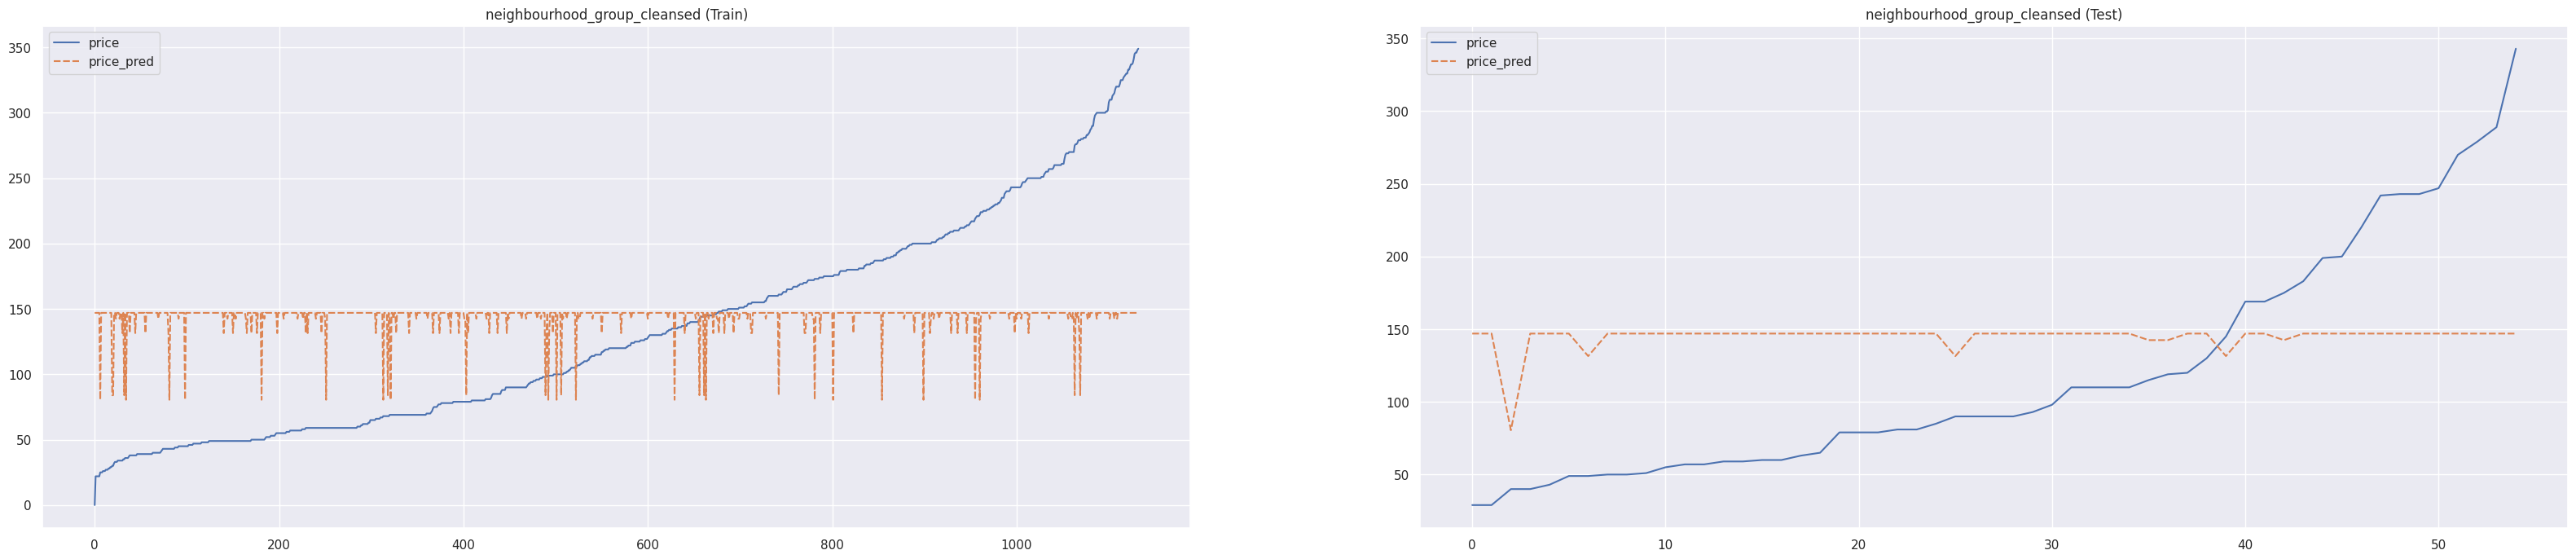

In [2148]:
#Plot the results of our fit
plotActualPred(y_train, y_train_pred, y_test, y_test_pred, "neighbourhood_group_cleansed (Train)", "neighbourhood_group_cleansed (Test)", figSize = (40,8))

### Analysis: neighbour_group_cleansed vs price


*   With explained variance of less than 0 signifies this feature is not able to explain any of the variability
*   We will explore other variables



---
##1e) property_type vs price 

In [2149]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'property_type' in col]])
y_train, y_train_pred, y_test, y_test_pred = calcLinRegressionCategorical(X,y,0.2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.49185041713619626
Mean Squared Error (MSE) 	: 3614.419183698382
Root Mean Squared Error (RMSE) 	: 60.12003978457085

Accuracy of Model        	Test Dataset
Explained Variance (R^2) 	: 0.5101308093242058
Mean Squared Error (MSE) 	: 3395.675391911781
Root Mean Squared Error (RMSE) 	: 58.272423940589434



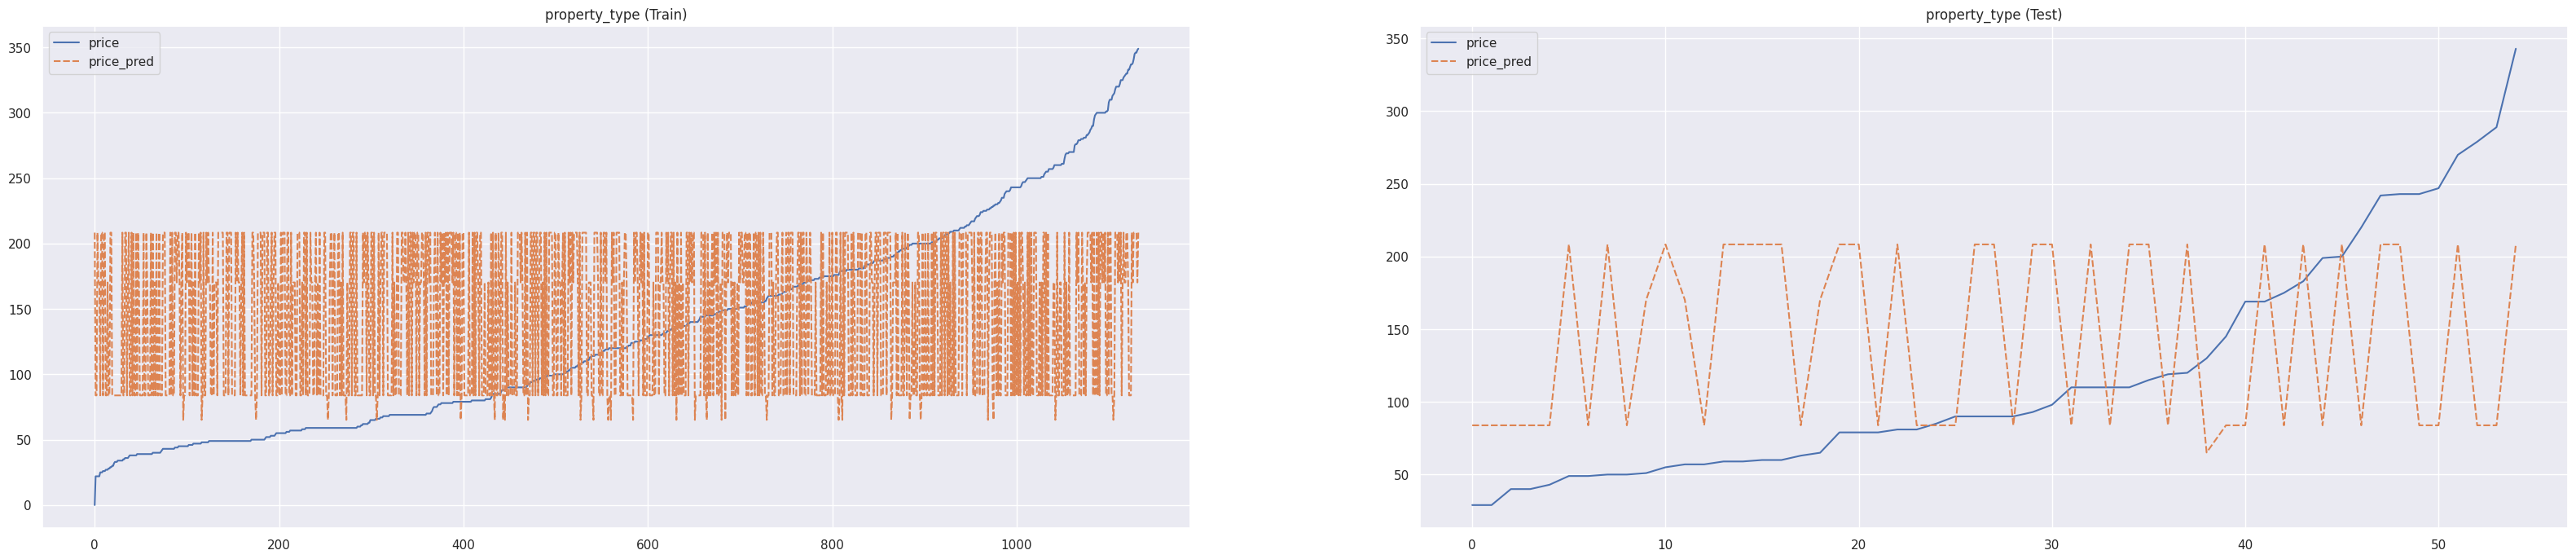

In [2150]:
#Plot the results of our fit
plotActualPred(y_train, y_train_pred, y_test, y_test_pred, "property_type (Train)", "property_type (Test)", figSize = (40,8))

###Analysis: property_type vs price


1.   with a explained variance of 0.28 for train signifies property_type is not a good predictor 
2.   We will explore other variables




---
## 1f) accommodates vs price 

Regression intercept 		: b =  100.57187423749924
Regression coefficients 	: a =  [19.40980996]
-------------------------------
Goodness of Fit (Train)
Explained Variance (R^2) 	: 0.14043279302559986
Mean Squared Error (MSE)	: 21165.590289463307
Root Mean Squared Error (RMSE) 	: 145.48398636779
-------------------------------
Goodness of Fit (Test)
Explained Variance (R^2) 	: 0.13121097382734892
Mean Squared Error (MSE)	: 21600.162247245684
Root Mean Squared Error (RMSE) 	: 146.96993654229317



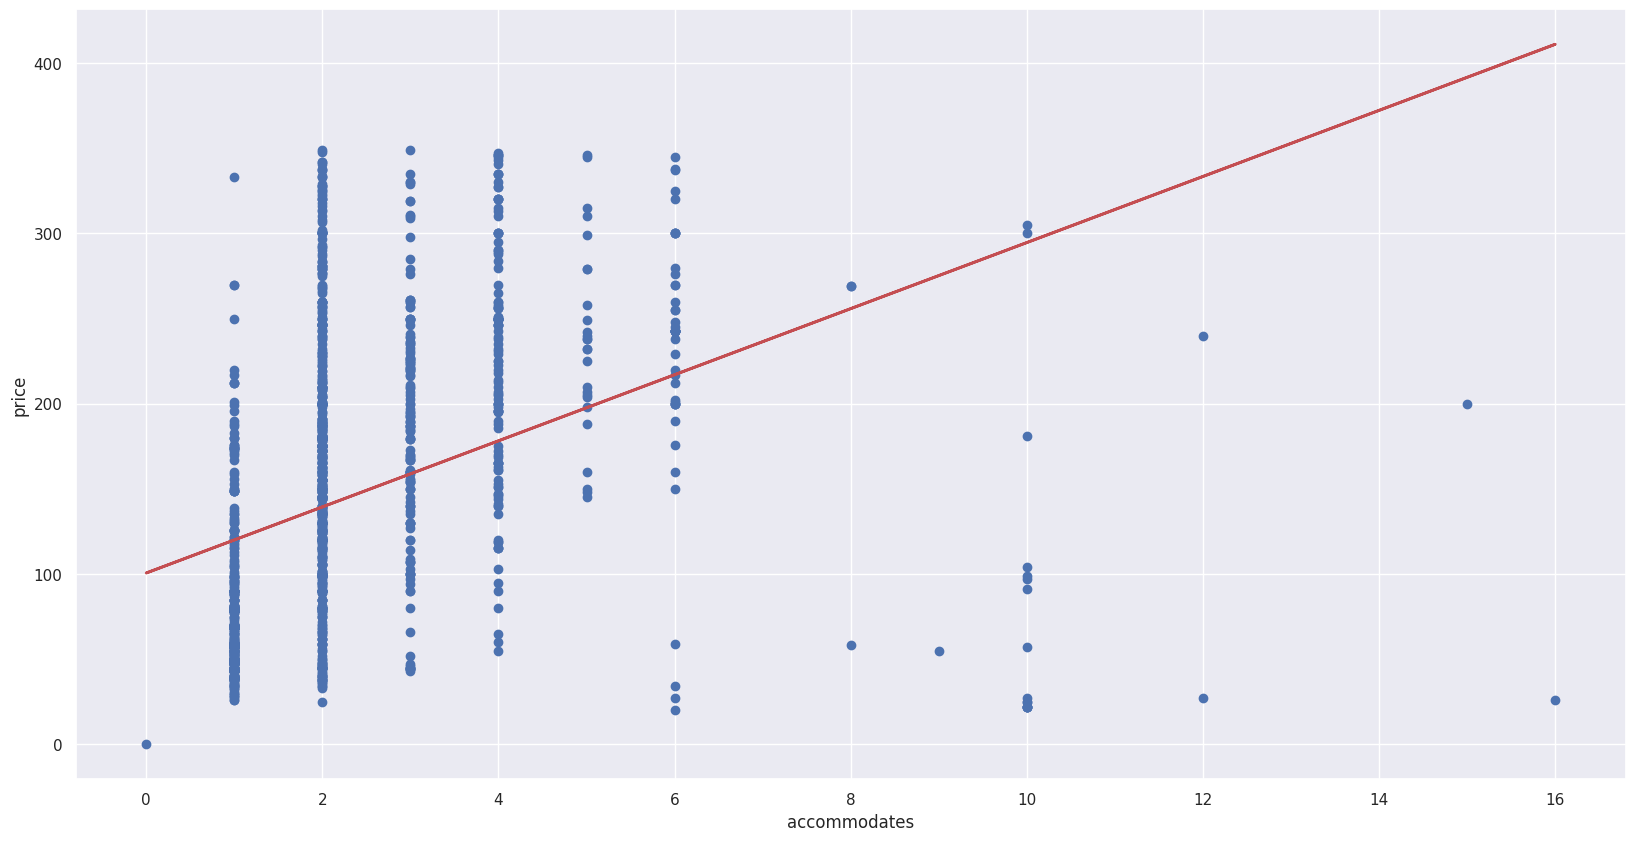

In [2151]:
#Try to predict price using accommodates
accommodatesDF = pd.DataFrame(airDF["accommodates"])
price_test, price_train_pred, price_test_pred = calcLinRegression(accommodatesDF, priceDF, solidLine= True, xTitle = "accommodates", yTitle = "price")
None

### Analysis: accomodates vs price 

Using linear regression, the explained variance of just ~0.10 to ~0.14 shows that accommodates does not prove to be very useful in being a factor that affects price, and its mean squared error is very high.

---
## 1g) amenities vs price 
We will go through two approaches, one using the amenities in a one hot encoding, and the other using the number of amenities.


#### a) One Hot encoding's approach


In [2152]:
#lets clean amenities first
new_DF = pd.DataFrame(airDF)
testDF = pd.DataFrame(airDF["amenities"]).astype(str)

#Use a set as it prevents duplicate
uniqueNames = set()
for idx in range(0, len(testDF["amenities"])):
  #Test split on first and making data frame for scaling later
  s = testDF["amenities"][idx]
  #Replace the apostrophes
  s = s.replace("'", "")
  #Replace the [ and ]
  s = s.replace("[", "")
  s = s.replace("]", "")
  s = s.replace(", ", ",")
  wordList = s.split(",")
  #Update the string at this index
  testDF["amenities"].iloc[idx] = wordList;

  #Add each word into the set
  for x in wordList:
    uniqueNames.add(x)

#Then create our new pd with our set
amenitiesDF = pd.DataFrame(np.empty((len(testDF), len(uniqueNames))) * np.nan ,columns = list(uniqueNames))
#Loop through the current df 
for idx in range(0, len(testDF["amenities"])):
  words = testDF["amenities"][idx]
  #Loop through each amenity, and then update our adj matrix
  for word in words:
    amenitiesDF[word][idx] = 1

amenitiesDF = amenitiesDF.fillna(0)
amenitiesDF

First aid kit  Outdoor furniture  Patio or balcony  Wine glasses  \
0               0.0                1.0               0.0           0.0   
1               0.0                1.0               0.0           0.0   
2               0.0                0.0               0.0           0.0   
3               0.0                0.0               0.0           0.0   
4               0.0                1.0               0.0           0.0   
...             ...                ...               ...           ...   
1746            0.0                0.0               0.0           0.0   
1747            0.0                0.0               0.0           0.0   
1748            0.0                0.0               0.0           0.0   
1749            0.0                0.0               0.0           0.0   
1750            0.0                0.0               0.0           0.0   

      Toaster  Breakfast  Cleaning products  Luggage dropoff allowed  \
0         0.0        0.0                0.0                      0.0   
1         0.0        0.0                0.0                      0.0   
2         0.0        0.0                0.0                      0.0   
3         0.0        0.0                0.0                      0.0   
4         0.0        0.0                0.0                      1.0   
...       ...        ...                ...                      ...   
1746      0.0        0.0                0.0                      0.0   
1747      0.0        0.0                0.0                      0.0   
1748      0.0        0.0                0.0                      0.0   
1749      0.0        0.0                0.0                      0.0   
1750      0.0        0.0                0.0                      0.0   

      Rice maker  Smoking allowed  ...  Security cameras on property  \
0            0.0              0.0  ...                           0.0   
1            0.0              0.0  ...                           0.0   
2            0.0              0.0  ...                           0.0   
3            0.0              0.0  ...                           0.0   
4            0.0              0.0  ...                           1.0   
...          ...              ...  ...                           ...   
1746         0.0              0.0  ...                           1.0   
1747         0.0              0.0  ...                           1.0   
1748         0.0              0.0  ...                           1.0   
1749         0.0              0.0  ...                           1.0   
1750         0.0              0.0  ...                           1.0   

      Shared gym in building  Dryer  Free washer \\u2013 In unit  \
0                        0.0    1.0                          0.0   
1                        0.0    1.0                          0.0   
2                        0.0    1.0                          0.0   
3                        0.0    1.0                          0.0   
4                        0.0    1.0                          0.0   
...                      ...    ...                          ...   
1746                     0.0    0.0                          0.0   
1747                     0.0    0.0                          0.0   
1748                     0.0    0.0                          0.0   
1749                     0.0    0.0                          0.0   
1750                     0.0    0.0                          0.0   

      Dishes and silverware  Coffee maker  Ethernet connection  Crib  \
0                       0.0           1.0                  0.0   0.0   
1                       0.0           1.0                  0.0   0.0   
2                       0.0           0.0                  0.0   0.0   
3                       1.0           0.0                  0.0   0.0   
4                       0.0           0.0                  0.0   0.0   
...                     ...           ...                  ...   ...   
1746                    0.0           0.0                  0.0   0

In [2153]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
#X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'property_type' in col]])
X = pd.DataFrame(amenitiesDF)
y_train, y_train_pred, y_test, y_test_pred = calcLinRegressionCategorical(X,y,0.2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6002175038631574
Mean Squared Error (MSE) 	: 2843.6145026436393
Root Mean Squared Error (RMSE) 	: 53.32555206131146

Accuracy of Model        	Test Dataset
Explained Variance (R^2) 	: 0.5029102240771197
Mean Squared Error (MSE) 	: 3445.7270467319318
Root Mean Squared Error (RMSE) 	: 58.70031555904902



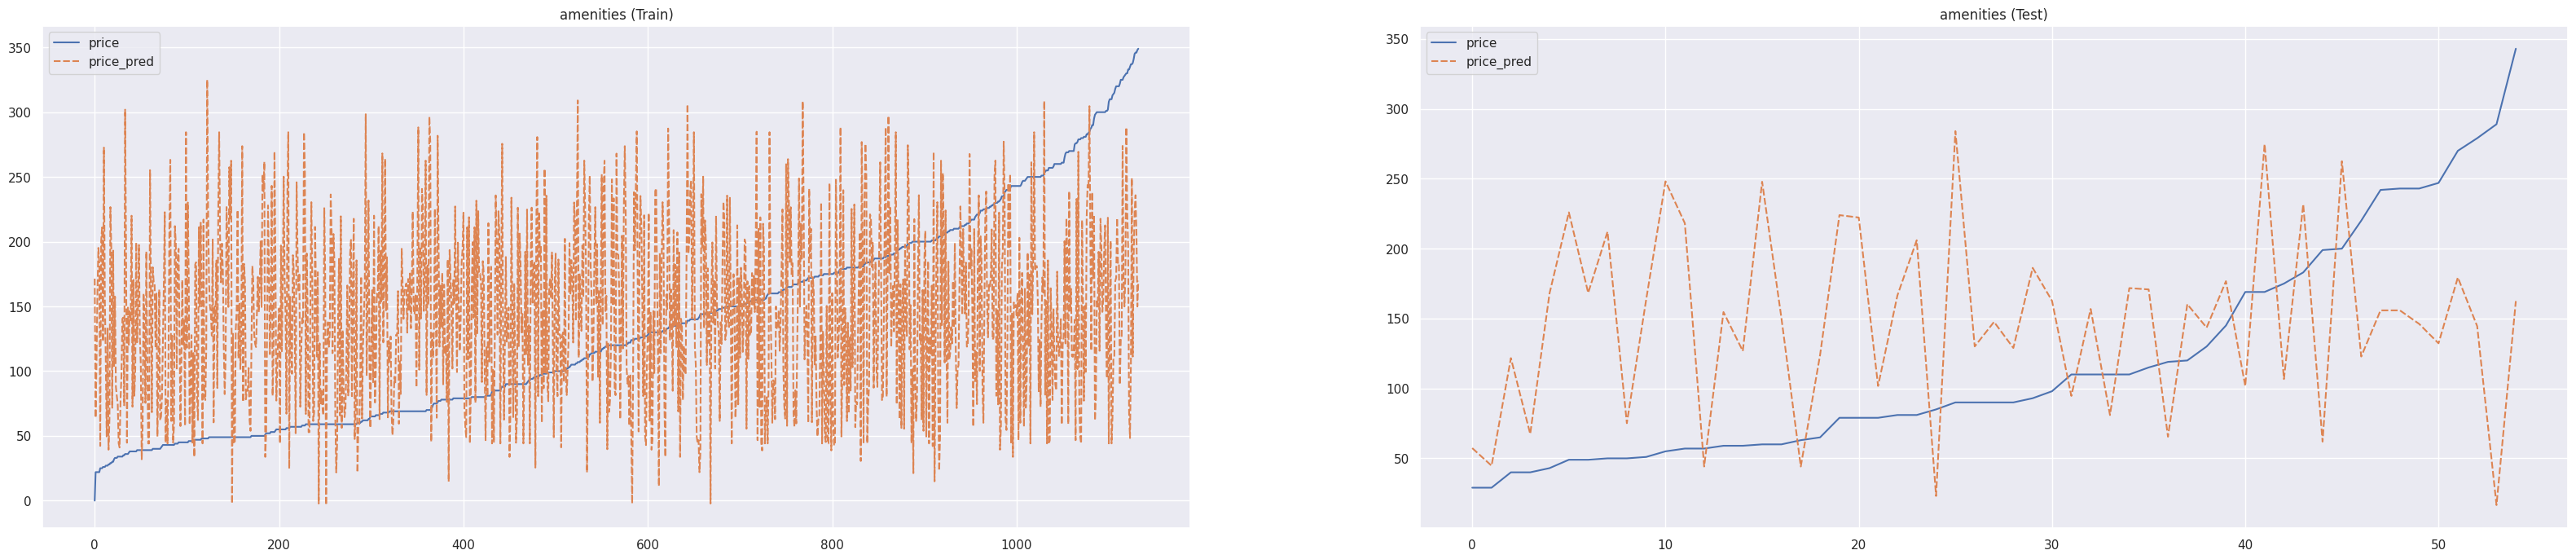

In [2154]:
#Plot the results of our fit
plotActualPred(y_train, y_train_pred, y_test, y_test_pred, "amenities (Train)", "amenities (Test)", figSize = (40,8))

### Analysis: amenities vs price


*   Both models have an explained variance of 0.5 signifies that the model can explain half of the variability of the response, which is pretty good among those we have seen so far.
*   We need to explore other variables




### b) Number of amenities' approach


Regression intercept 		: b =  113.80982300504535
Regression coefficients 	: a =  [1.3418511]
-------------------------------
Goodness of Fit (Train)
Explained Variance (R^2) 	: 0.01933645512390414
Mean Squared Error (MSE)	: 14810.603667232932
Root Mean Squared Error (RMSE) 	: 121.69882360661065
-------------------------------
Goodness of Fit (Test)
Explained Variance (R^2) 	: 0.004171019067026327
Mean Squared Error (MSE)	: 14786.736901708682
Root Mean Squared Error (RMSE) 	: 121.6007273897187



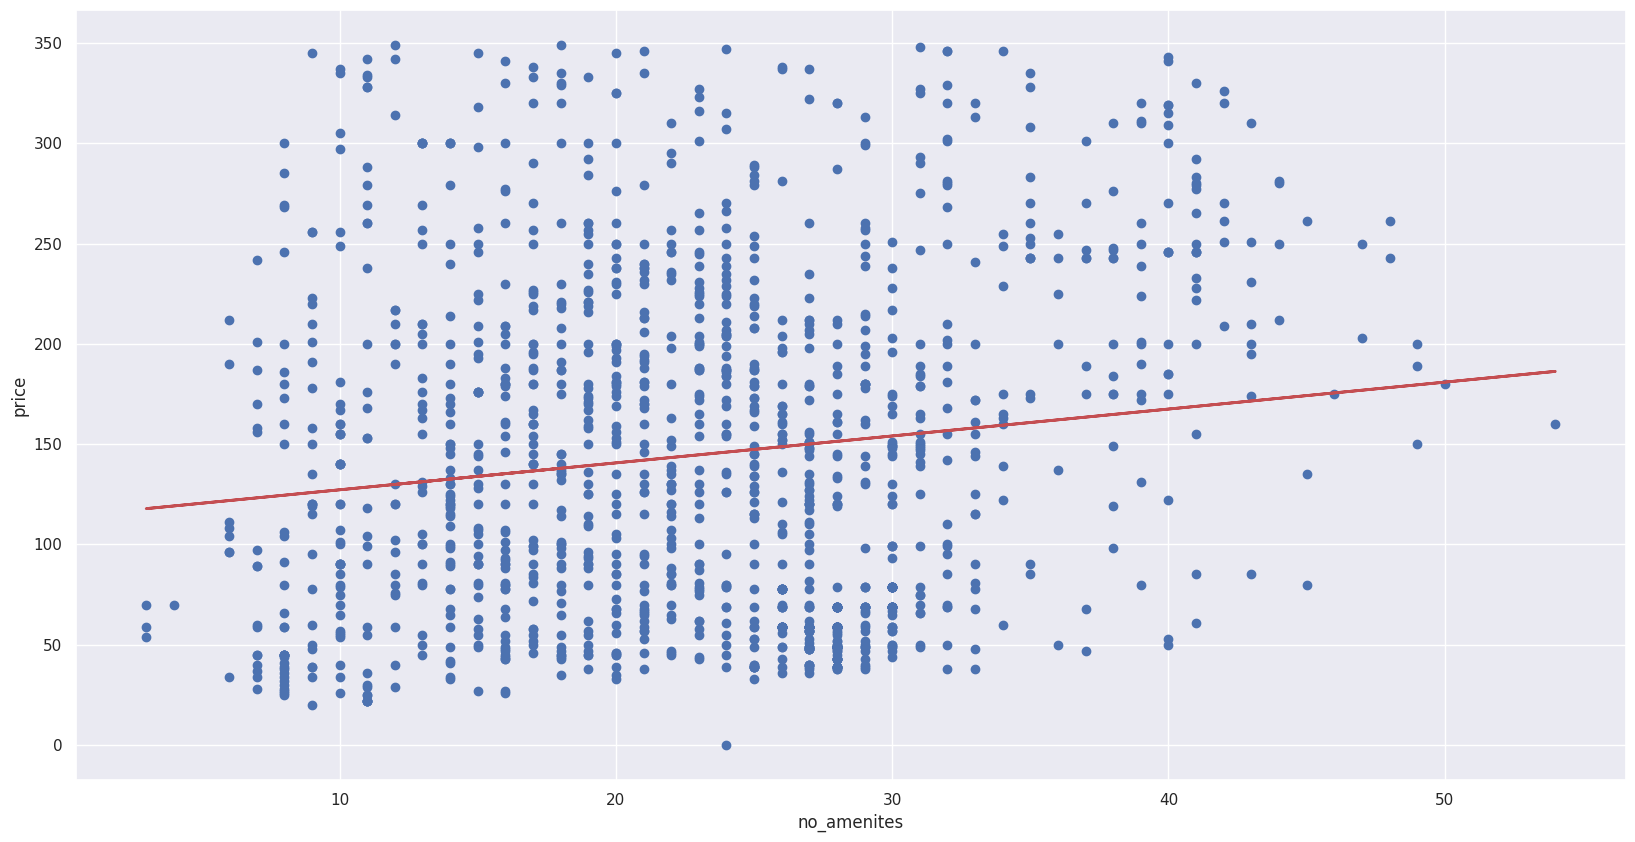

In [2155]:
#Try to predict price using no_amenities
noAmenitiesDF = pd.DataFrame(airDF["no_amenities"])
price_test, price_train_pred, price_test_pred = calcLinRegression(noAmenitiesDF, priceDF, solidLine= True, xTitle = "no_amenites", yTitle = "price")
None

### Analysis: number of amenities vs price

1.   Explained variance of close to 0 signifies that this model is not able to explain any of the varability in the response
2.   We will explore other variables


---
## 1h) number_of_reviews vs price 

Regression intercept 		: b =  148.02496709748894
Regression coefficients 	: a =  [-0.28929618]
-------------------------------
Goodness of Fit (Train)
Explained Variance (R^2) 	: 0.012004554731541939
Mean Squared Error (MSE)	: 19359.498992419074
Root Mean Squared Error (RMSE) 	: 139.1384166663509
-------------------------------
Goodness of Fit (Test)
Explained Variance (R^2) 	: -0.010616892052416338
Mean Squared Error (MSE)	: 19349.77555454466
Root Mean Squared Error (RMSE) 	: 139.1034706775667



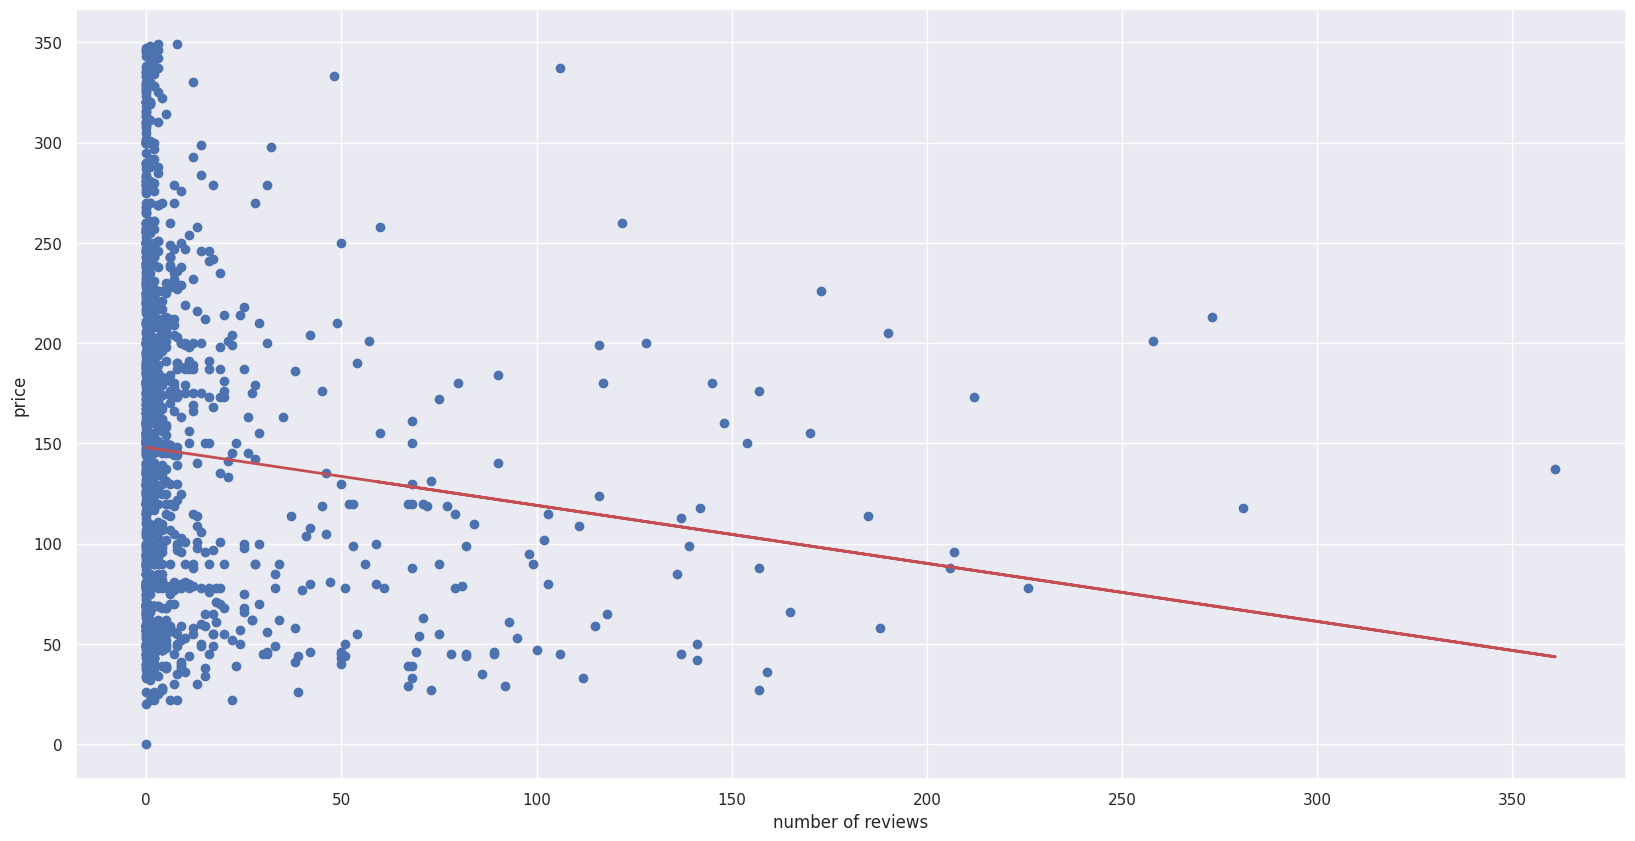

In [2156]:
#Try to predict price using number_of_reviews
reviewsDF = pd.DataFrame(airDF["number_of_reviews"])
price_test, price_train_pred, price_test_pred = calcLinRegression(reviewsDF, priceDF, solidLine= True, xTitle = "number of reviews", yTitle = "price")
None

### Analysis: number of reviews vs price

1.   Similarly, explained variance of 0 suggests that the model is not able to explain any of the varability in the response




---

In [2157]:
#Store our alphas into an array that can be used by our cross validators
alphas = [0.0001, 0.001,0.01, 0.1, 1, 10,100,1000]

# Ridge Regression

In [2158]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [2159]:
def ridgeRegression(predictor, response, title, test_size = 0.2):
  #Split the data set into train and test
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = random_state)
  ridge_cv = RidgeCV(alphas = alphas).fit(X_train, y_train)

  #Predict
  y_train_pred = ridge_cv.predict(X_train)
  # Goodness of Fit for Train Data
  print("Goodness of Fit of Model \tTrain Dataset")
  print("Explained Variance (R^2) \t:", ridge_cv.score(X_train, y_train))
  print("Mean Squared Error (MSE) \t:",
        mean_squared_error(y_train, y_train_pred))
  print("Root Mean Squared Error (RMSE) \t:",
        np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print()

  # Accuracy for Test Data
  y_test_pred = ridge_cv.predict(X_test)
  print("Goodness of Fit of Model \tTest Dataset")
  print("Explained Variance (R^2) \t:", ridge_cv.score(X_test, y_test))
  print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
  print("Root Mean Squared Error (RMSE) \t:",
        np.sqrt(mean_squared_error(y_test, y_test_pred)))
  print()
  plotActualPred(y_train, y_train_pred, y_test, y_test_pred, title + " [Ridge] (Train)", title + " [Ridge] (Test)", figSize = (40,8))
  return y_train, y_train_pred, y_test, y_test_pred


---
##1a) All features vs price

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6133779883896363
Mean Squared Error (MSE) 	: 2750.0052400497543
Root Mean Squared Error (RMSE) 	: 52.44049237039784

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5600227380725281
Mean Squared Error (MSE) 	: 3049.8345063644033
Root Mean Squared Error (RMSE) 	: 55.22530675663471



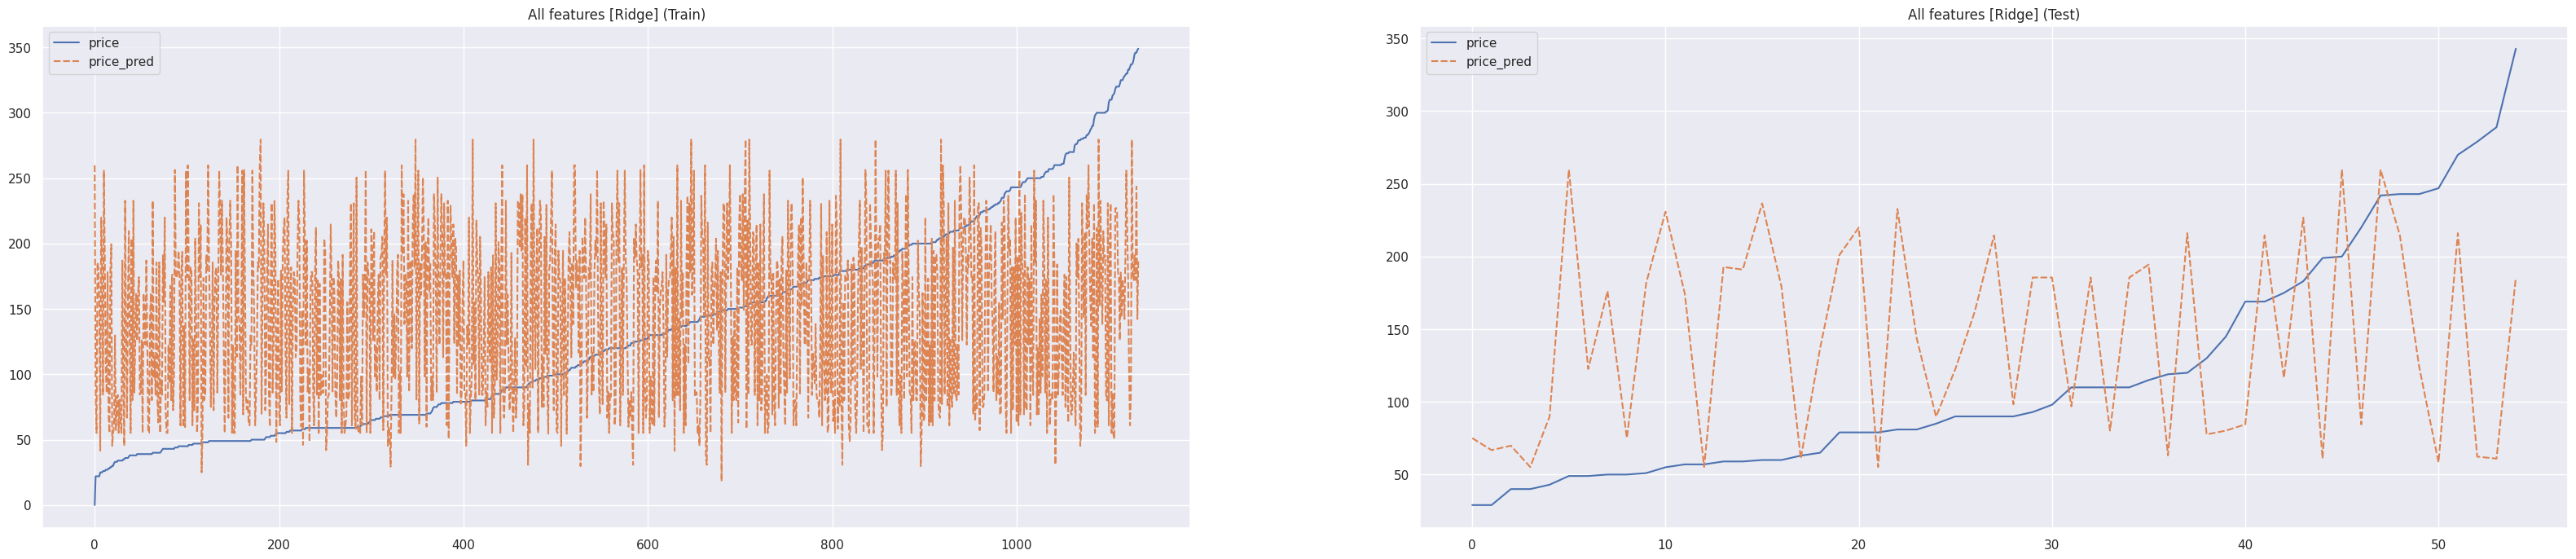

In [2160]:
#Extract response and predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe.drop(numerical_variables, axis=1))

y_train_ridge, y_train_pred_ridge, y_test_ridge, y_test_pred_ridge = ridgeRegression(X,y,"All features")

###Analysis: All features vs price


*   Add in analysis



---
## 1b) host_response_time vs price 

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.08474218726783911
Mean Squared Error (MSE) 	: 6510.1409268609
Root Mean Squared Error (RMSE) 	: 80.6854443308141

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.13175871671892891
Mean Squared Error (MSE) 	: 6018.475168467297
Root Mean Squared Error (RMSE) 	: 77.57883196122056



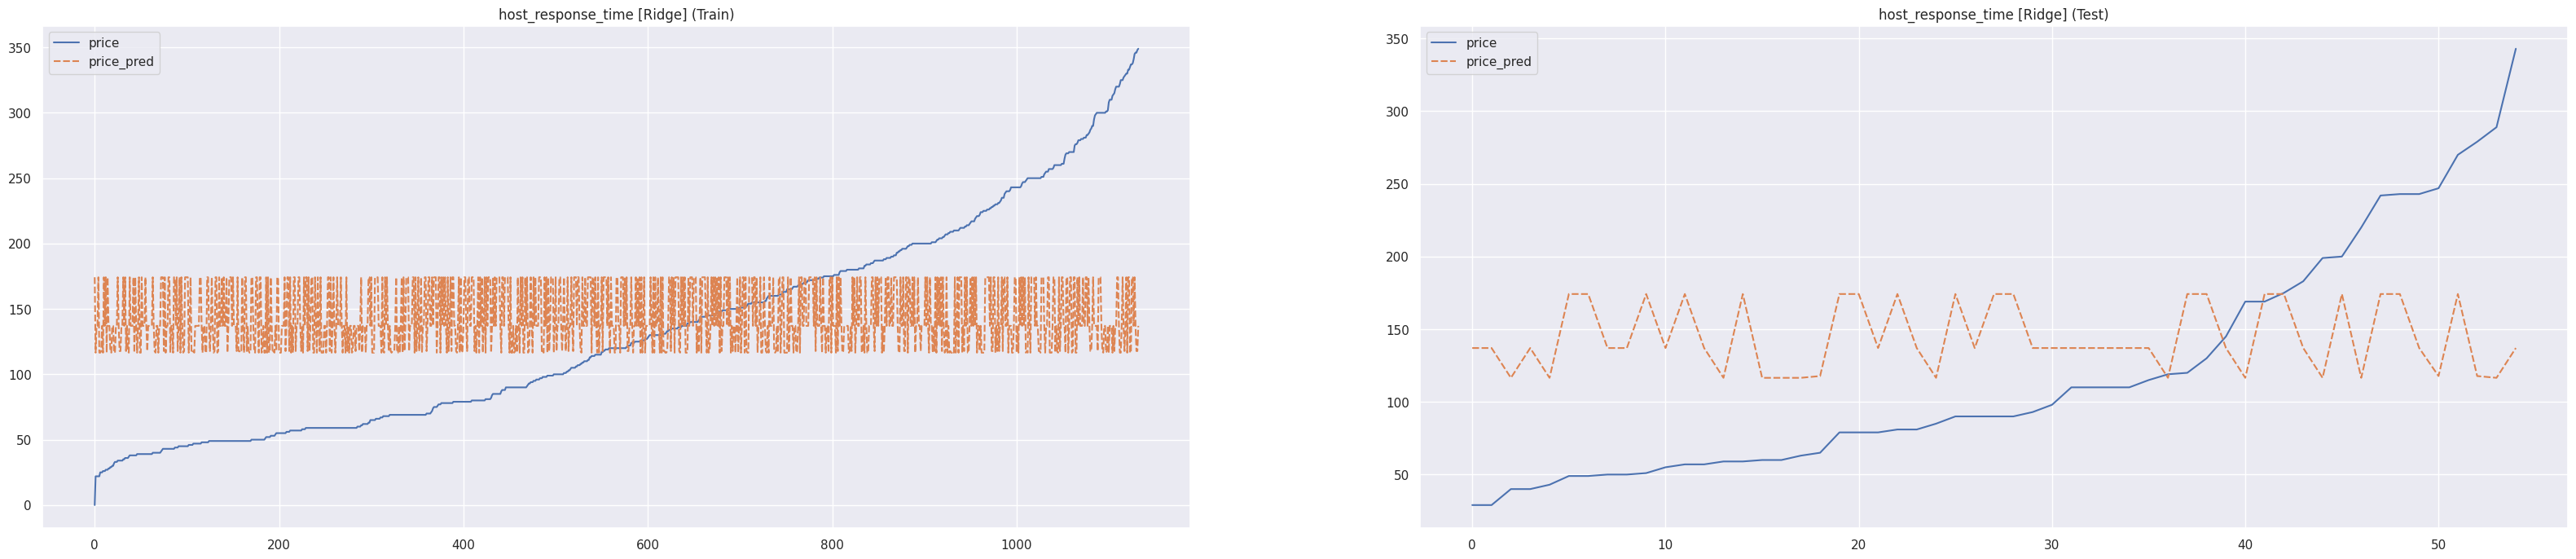

In [2161]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'host_response_time' in col]])
y_train, y_train_pred, y_test, y_test_pred = ridgeRegression(X,y, "host_response_time")

### Analysis: host_response_time vs price



*   Insert analysis!



---
## 1c) neighbourhood_cleansed vs price

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3026826864699127
Mean Squared Error (MSE) 	: 4959.951085552094
Root Mean Squared Error (RMSE) 	: 70.42692017653543

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.18711537828060654
Mean Squared Error (MSE) 	: 5634.75384648732
Root Mean Squared Error (RMSE) 	: 75.06499747876715



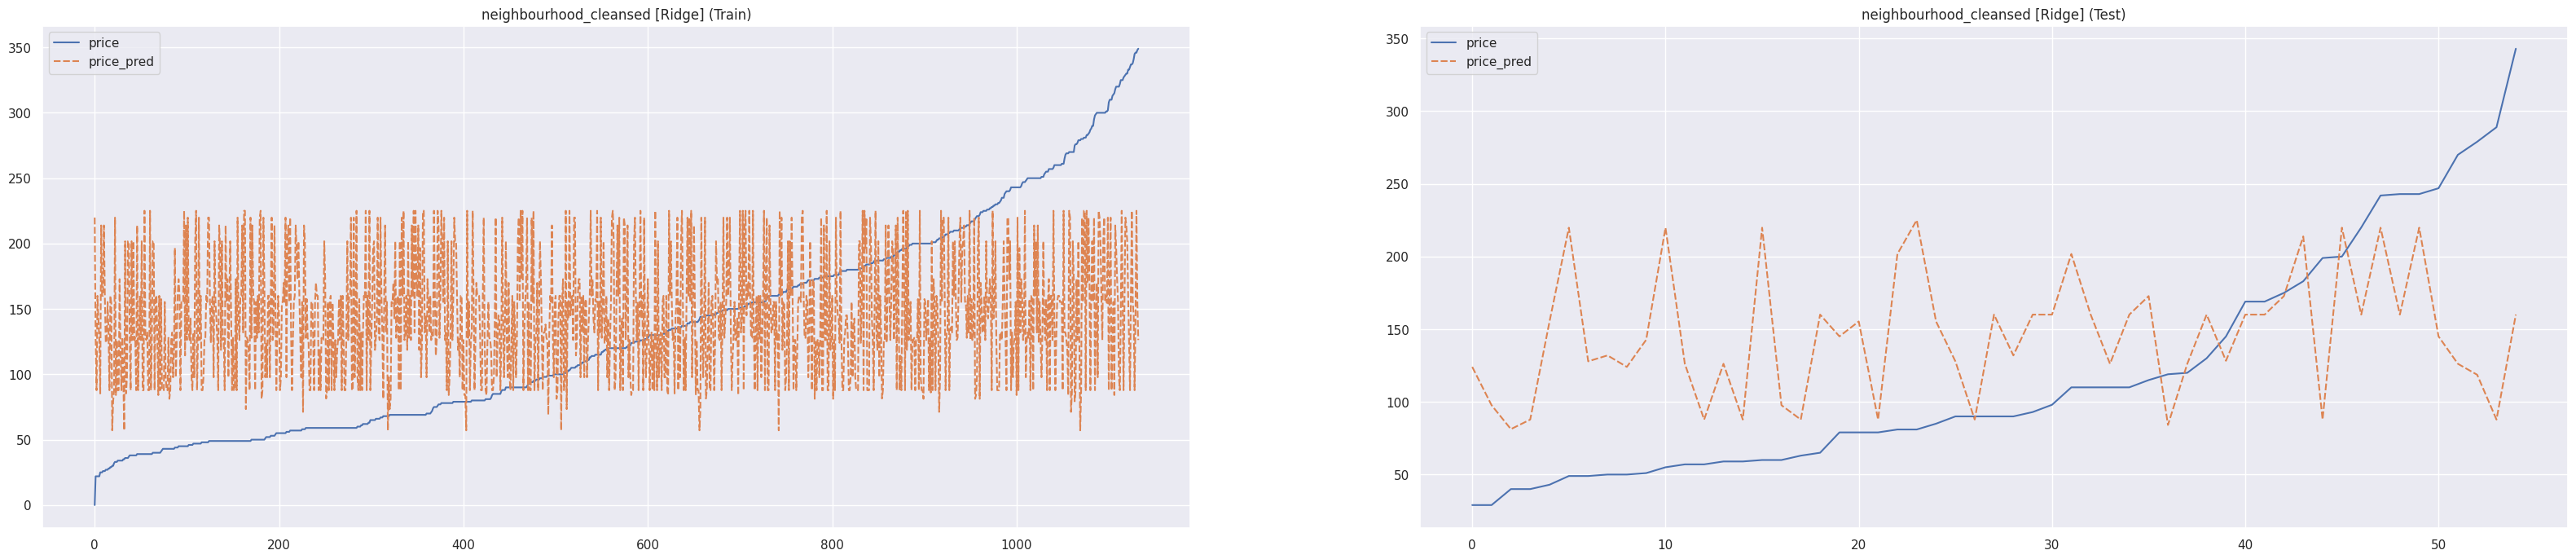

In [2162]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'neighbourhood_cleansed' in col]])
y_train, y_train_pred, y_test, y_test_pred = ridgeRegression(X,y, "neighbourhood_cleansed")

### Analysis: neighbourhood_cleansed vs price


1.   Insert analysis



---
## 1d) neighbourhood_group_cleansed vs price

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.024521435789466528
Mean Squared Error (MSE) 	: 6938.485348937306
Root Mean Squared Error (RMSE) 	: 83.29757108666078

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.015685236651103773
Mean Squared Error (MSE) 	: 7040.527205367416
Root Mean Squared Error (RMSE) 	: 83.90784948601302



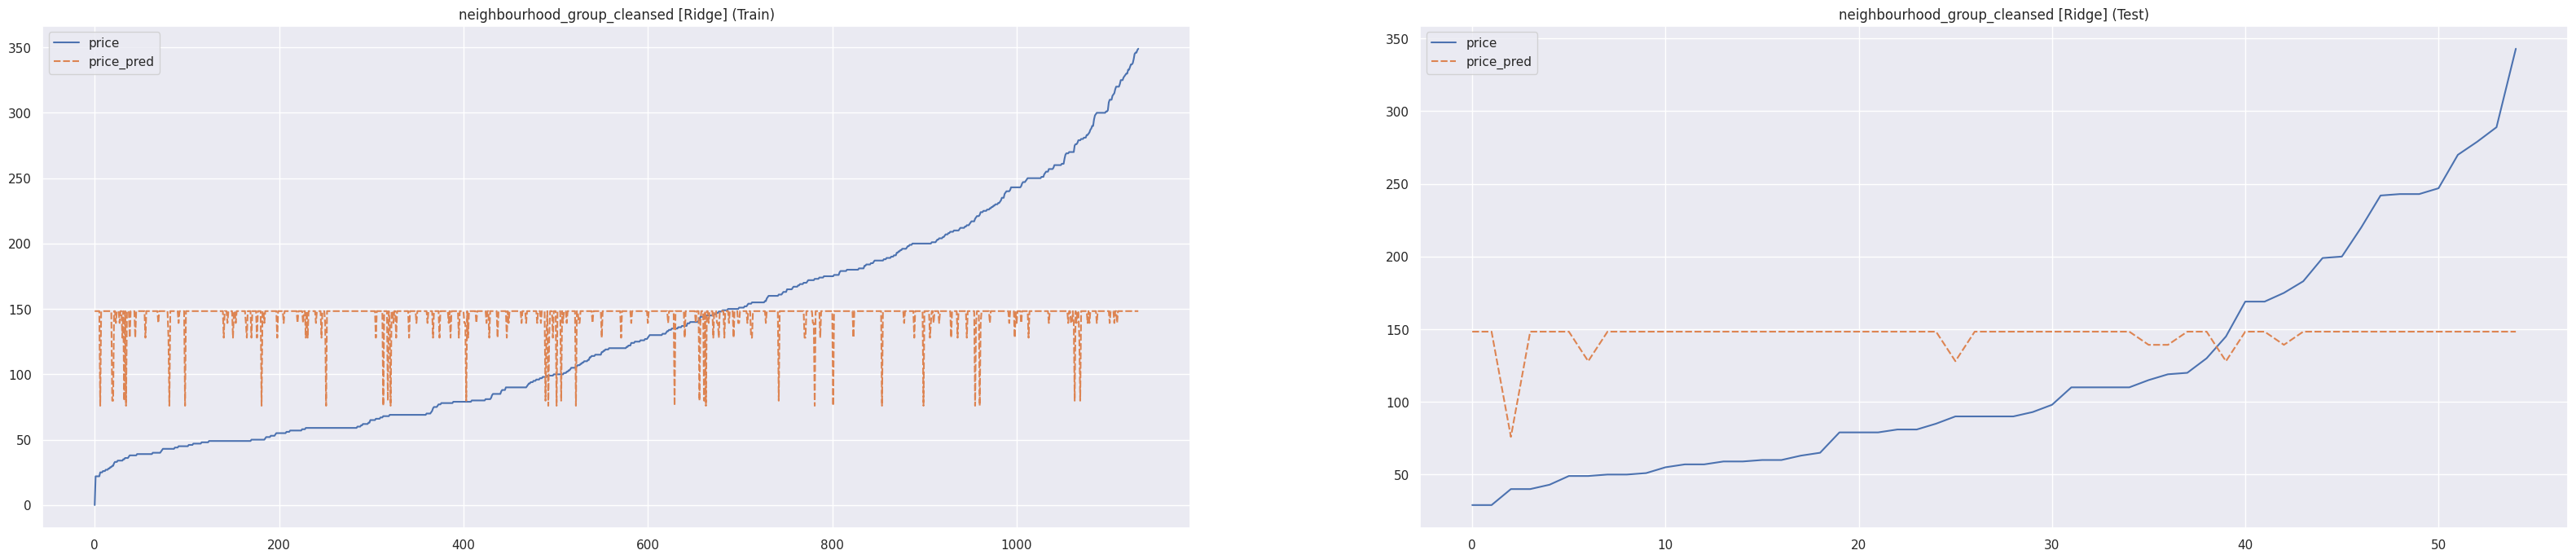

In [2163]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'neighbourhood_group_cleansed_' in col]])
y_train, y_train_pred, y_test, y_test_pred = ridgeRegression(X,y,"neighbourhood_group_cleansed")

### Analysis: neighbour_group_cleansed vs price


*  Insert analysis



---
##1e) property_type vs price 

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.49185278770908536
Mean Squared Error (MSE) 	: 3614.402322041076
Root Mean Squared Error (RMSE) 	: 60.1198995511559

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5101961334173659
Mean Squared Error (MSE) 	: 3395.222578344681
Root Mean Squared Error (RMSE) 	: 58.268538495011875



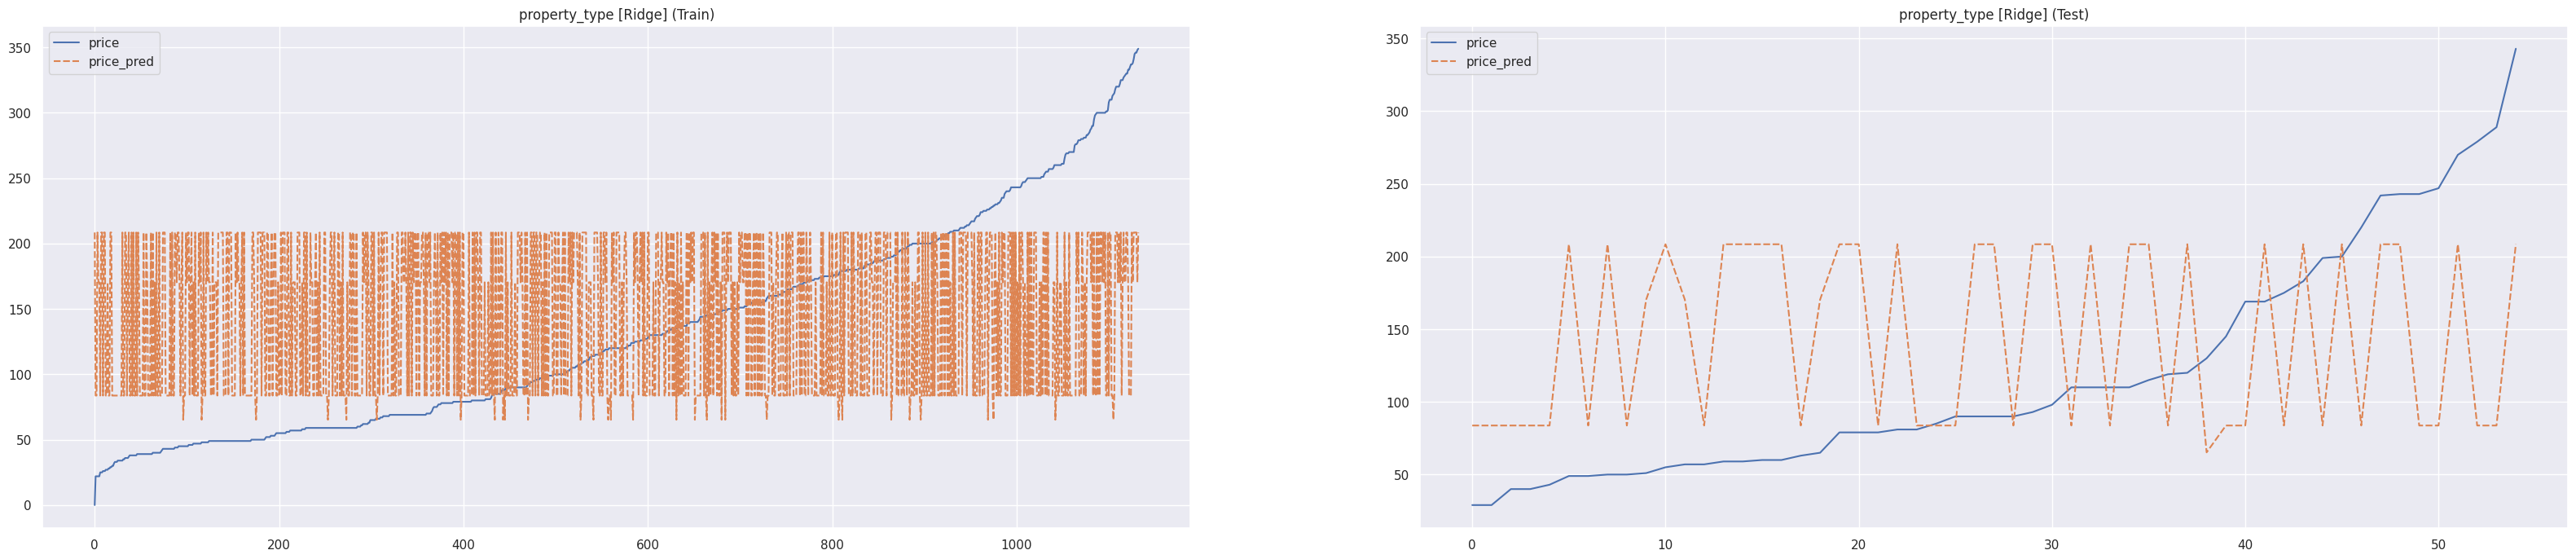

In [2164]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'property_type' in col]])
y_train, y_train_pred, y_test, y_test_pred = ridgeRegression(X,y,"property_type")

###Analysis: property_type vs price


1.   Insert




---
## 1f) accommodates vs price 

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.14033614868637734
Mean Squared Error (MSE) 	: 6114.706418154812
Root Mean Squared Error (RMSE) 	: 78.19658827694985

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.13131828163172454
Mean Squared Error (MSE) 	: 6021.528176527043
Root Mean Squared Error (RMSE) 	: 77.59850627767936



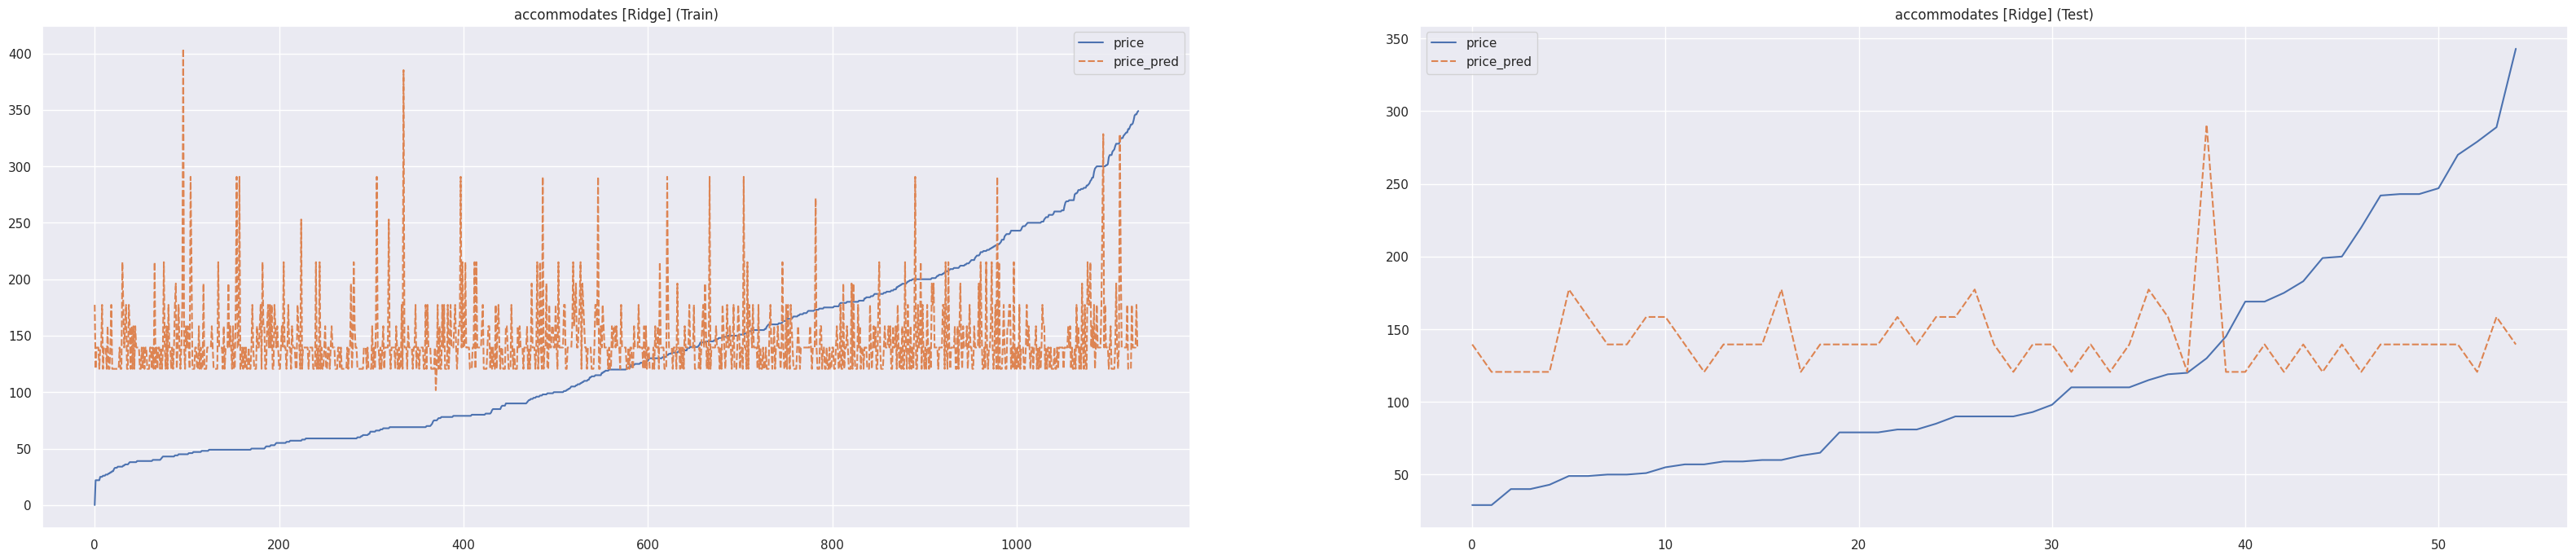

In [2165]:
#Try to predict price using accommodates
X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'accommodates' in col]])
y = pd.DataFrame(priceDF)
y_train, y_train_pred, y_test, y_test_pred = ridgeRegression(X,y,"accommodates")
None

### Analysis: accomodates vs price 

Insert

---
## 1g) amenities vs price 
We will go through two approaches, one using the amenities in a one hot encoding, and the other using the number of amenities.


#### a) One Hot encoding's approach


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5964968662557235
Mean Squared Error (MSE) 	: 2870.0790406407177
Root Mean Squared Error (RMSE) 	: 53.573118638368605

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5039281595538907
Mean Squared Error (MSE) 	: 3438.6709213114777
Root Mean Squared Error (RMSE) 	: 58.64018179807663



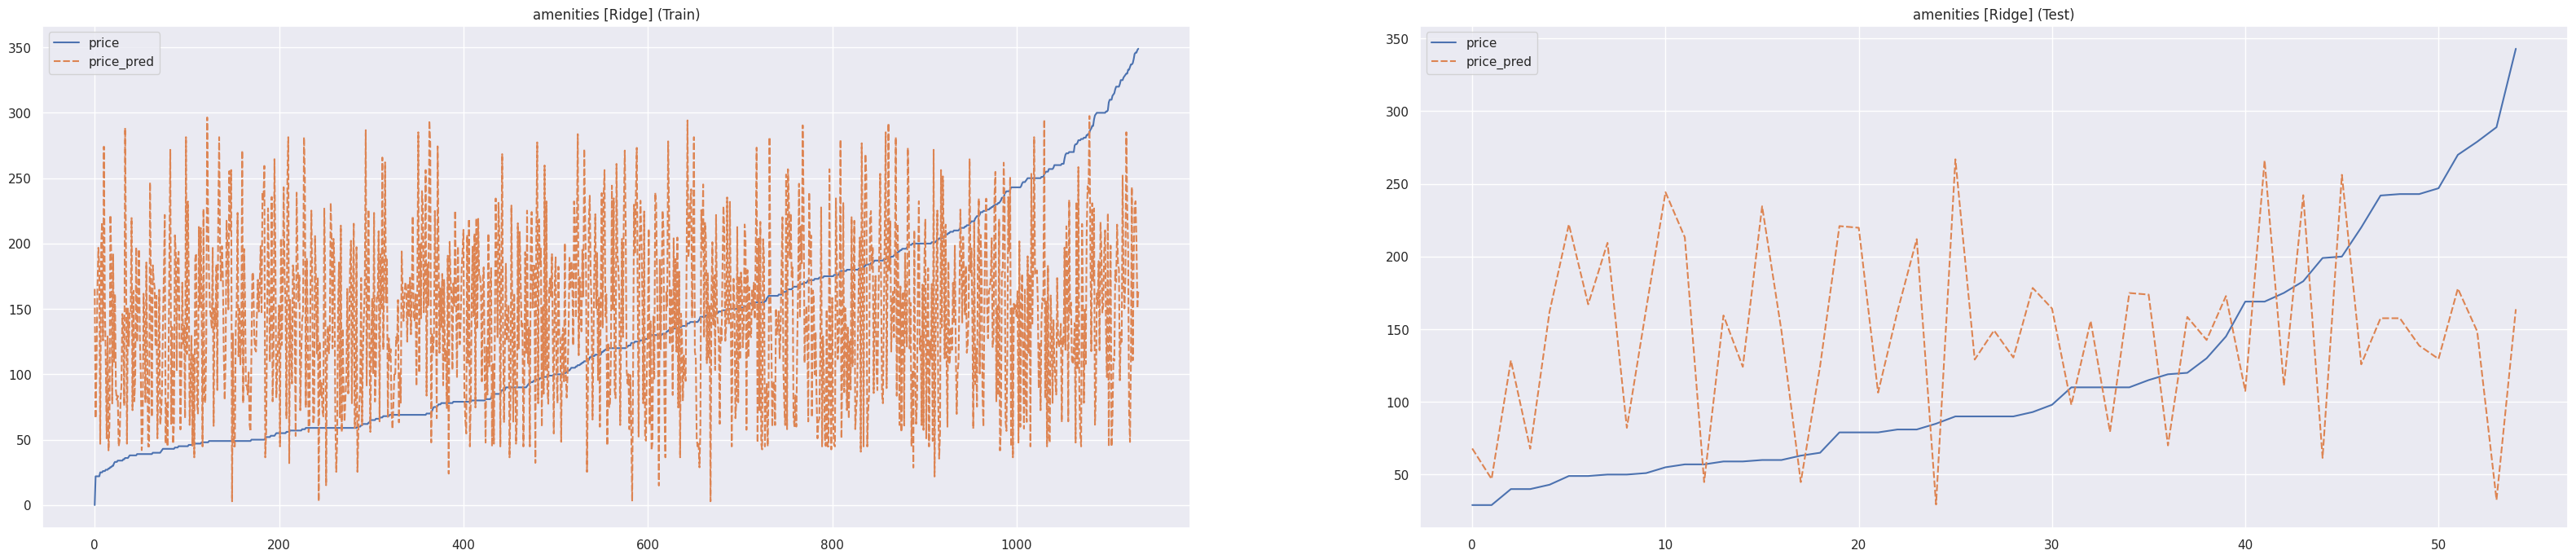

In [2166]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
#X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'property_type' in col]])
X = pd.DataFrame(amenitiesDF)
y_train, y_train_pred, y_test, y_test_pred = ridgeRegression(X,y,"amenities")

### Analysis: amenities vs price


*   Insert



### b) Number of amenities' approach


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.019334795513772818
Mean Squared Error (MSE) 	: 6975.3774231288435
Root Mean Squared Error (RMSE) 	: 83.51872498505256

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0042744604088827964
Mean Squared Error (MSE) 	: 6902.170571746286
Root Mean Squared Error (RMSE) 	: 83.07930290840365



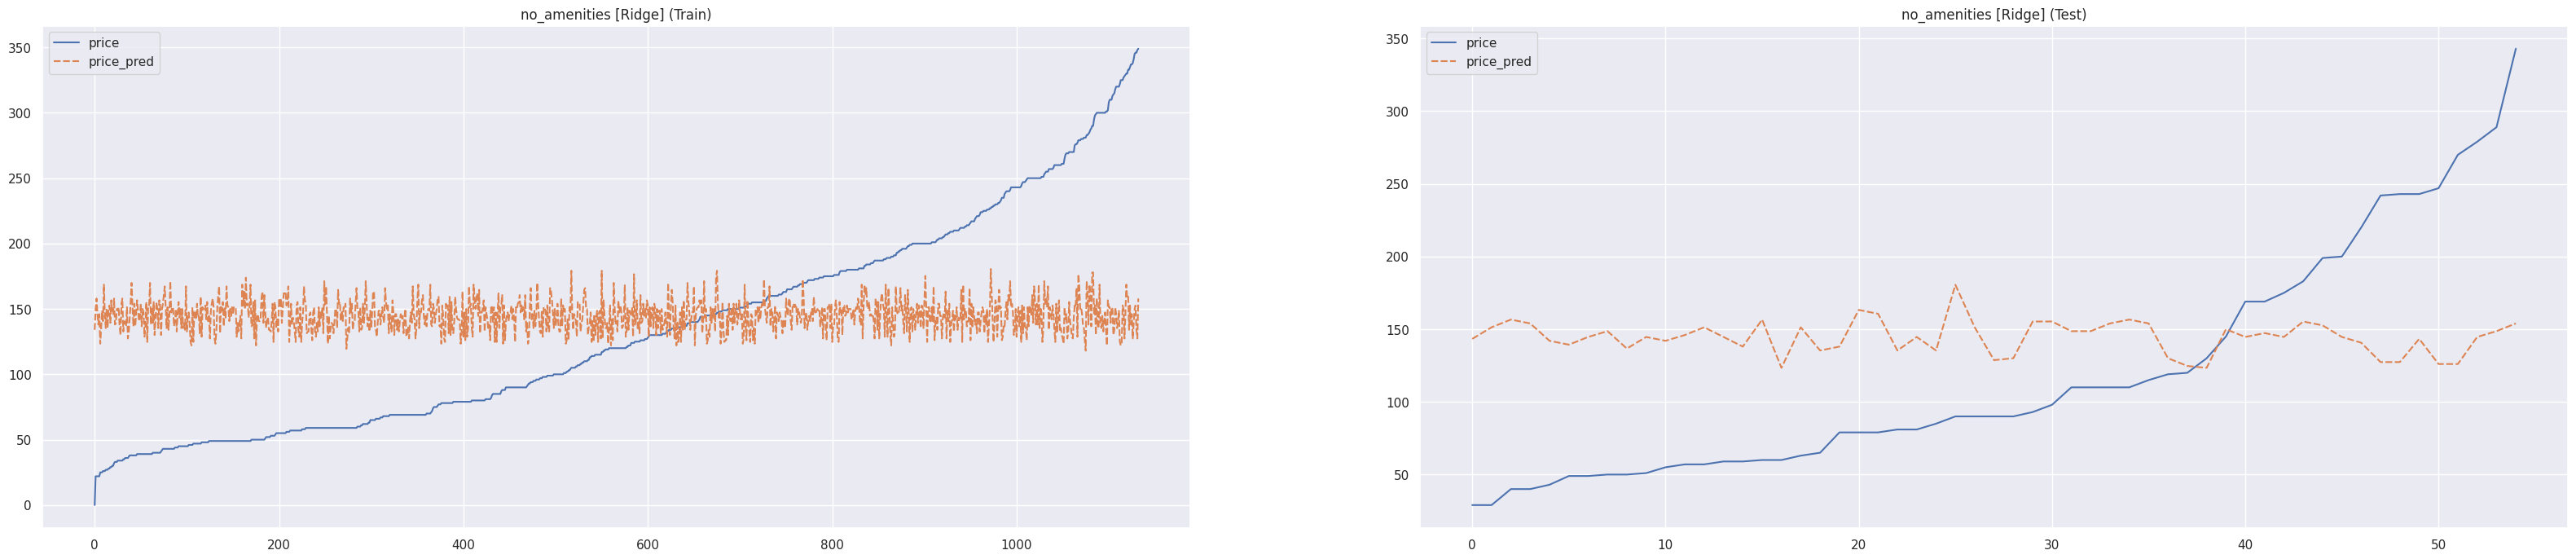

In [2167]:
#Try to predict price using no_amenities
X = pd.DataFrame(airDF["no_amenities"])
y = pd.DataFrame(priceDF)
y_train, y_train_pred, y_test, y_test_pred = ridgeRegression(X,y,"no_amenities")
None

### Analysis: number of amenities vs price

1.   Insert


---
## 1h) number_of_reviews vs price 

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.012004548855743646
Mean Squared Error (MSE) 	: 7027.516763660631
Root Mean Squared Error (RMSE) 	: 83.83028548001391

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.010604660426893231
Mean Squared Error (MSE) 	: 7005.30966568609
Root Mean Squared Error (RMSE) 	: 83.69772796011902



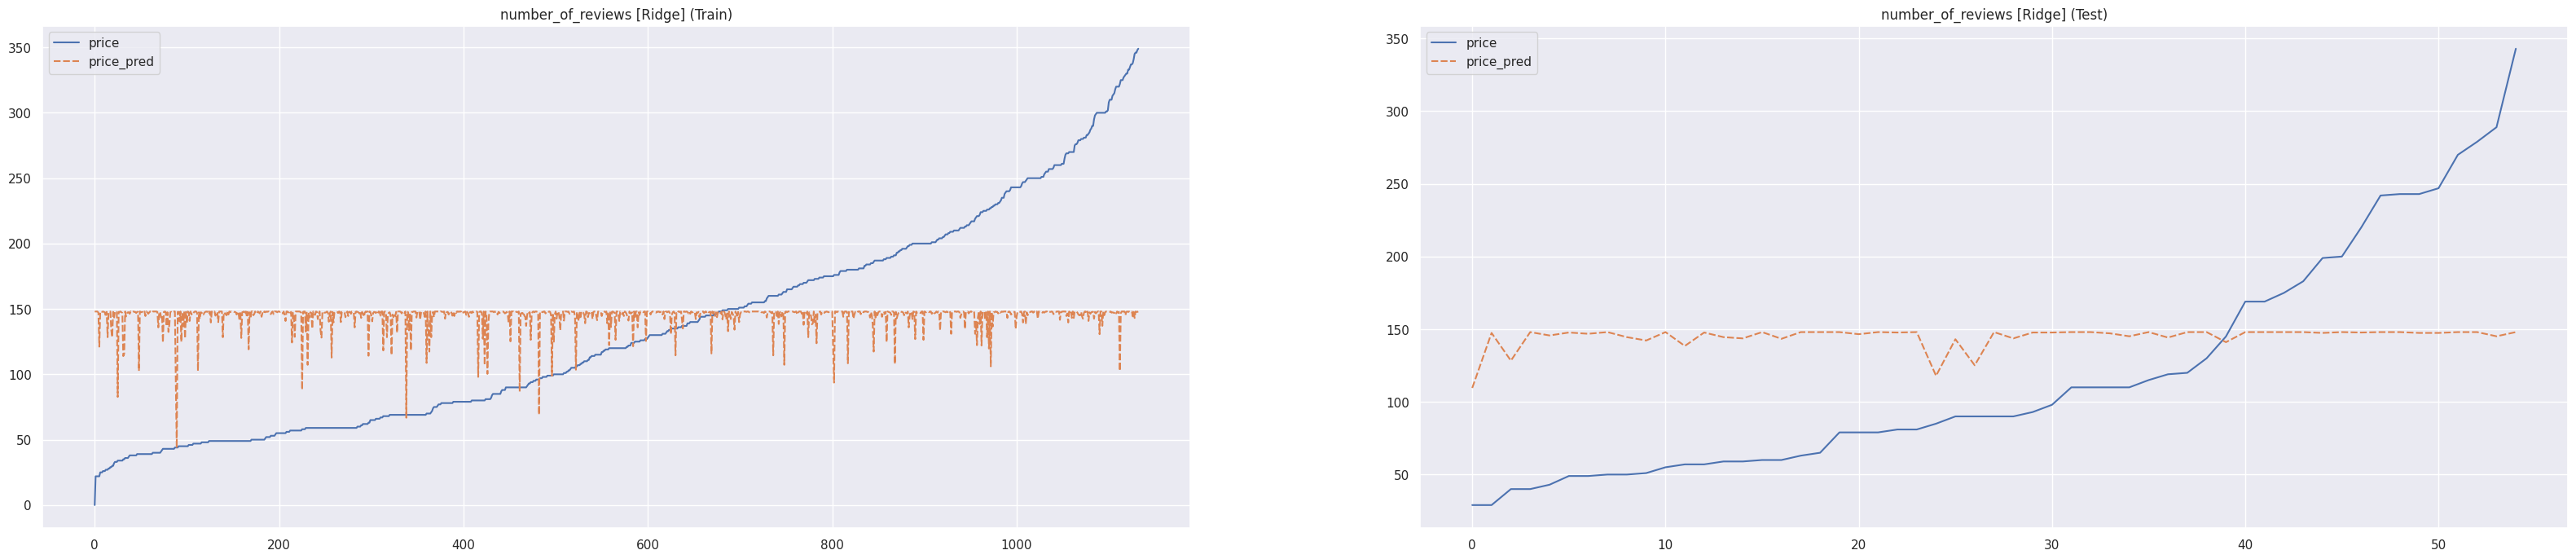

In [2168]:
#Try to predict price using number_of_reviews
X = pd.DataFrame(airDF["number_of_reviews"])
y = pd.DataFrame(priceDF)
y_train, y_train_pred, y_test, y_test_pred = ridgeRegression(X,y,"number_of_reviews")
None

### Analysis: number of reviews vs price

1.   Insert



# Lasso Regression

In [2169]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [2170]:
def lassoRegression(predictor, response, title, test_size = 0.2):
  #Split the data set into train and test
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = random_state)
  lasso_cv = LassoCV(alphas = alphas).fit(X_train, y_train)

  #Predict
  y_train_pred = lasso_cv.predict(X_train)
  # Goodness of Fit for Train Data
  print("Goodness of Fit of Model \tTrain Dataset")
  print("Explained Variance (R^2) \t:", lasso_cv.score(X_train, y_train))
  print("Mean Squared Error (MSE) \t:",
        mean_squared_error(y_train, y_train_pred))
  print("Root Mean Squared Error (RMSE) \t:",
        np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print()

  # Accuracy for Test Data
  y_test_pred = lasso_cv.predict(X_test)
  print("Goodness of Fit of Model \tTest Dataset")
  print("Explained Variance (R^2) \t:", lasso_cv.score(X_test, y_test))
  print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
  print("Root Mean Squared Error (RMSE) \t:",
        np.sqrt(mean_squared_error(y_test, y_test_pred)))
  print()
  plotActualPred(y_train, y_train_pred, y_test, y_test_pred, title + " [Lasso] (Train)", title + " [Lasso] (Test)", figSize = (40,8))
  return y_train, y_train_pred, y_test, y_test_pred


---
# Other mati susa.


## Gradient Booster

In [2171]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [2172]:
def gradBooster(predictor, response, title, test_size = 0.2):
  #Split the data set into train and test
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = random_state)

  #Define grad booster
  gradModel = HistGradientBoostingRegressor(max_iter=1000)
  gradModel.fit(X_train, y_train)

  #Predict
  y_train_pred = gradModel.predict(X_train)
  # Goodness of Fit for Train Data
  print("Goodness of Fit of Model \tTrain Dataset")
  print("Explained Variance (R^2) \t:", gradModel.score(X_train, y_train))
  print("Mean Squared Error (MSE) \t:",
        mean_squared_error(y_train, y_train_pred))
  print("Root Mean Squared Error (RMSE) \t:",
        np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print()

  # Accuracy for Test Data
  y_test_pred = gradModel.predict(X_test)
  print("Goodness of Fit of Model \tTest Dataset")
  print("Explained Variance (R^2) \t:", gradModel.score(X_test, y_test))
  print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
  print("Root Mean Squared Error (RMSE) \t:",
        np.sqrt(mean_squared_error(y_test, y_test_pred)))
  print()
  plotActualPred(y_train, y_train_pred, y_test, y_test_pred, title + " [Lasso] (Train)", title + " [Lasso] (Test)", figSize = (40,8))
  return y_train, y_train_pred, y_test, y_test_pred


---
##1a) All features vs price

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7320735118943454
Mean Squared Error (MSE) 	: 1905.7353800673457
Root Mean Squared Error (RMSE) 	: 43.65472918330093

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6330211032185531
Mean Squared Error (MSE) 	: 2543.824418581195
Root Mean Squared Error (RMSE) 	: 50.43634025760786



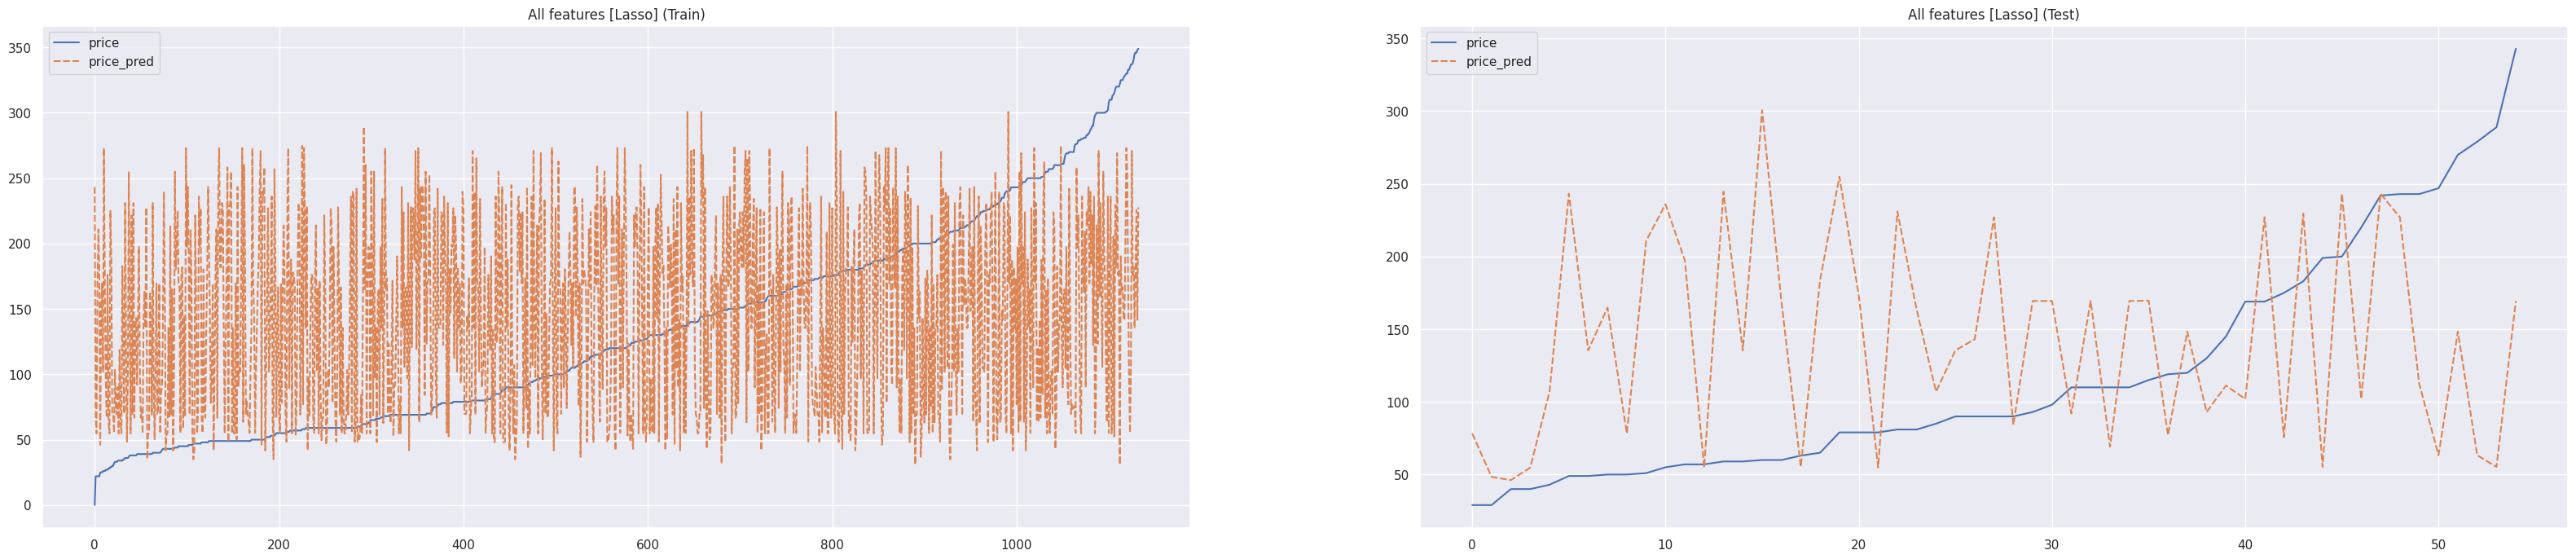

In [2173]:
#Extract response and predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe.drop(numerical_variables, axis=1))

y_train, y_train_pred, y_test, y_test_pred = gradBooster(X,y,"All features")

## XGBoost

In [2174]:
import xgboost as xgb

In [2175]:
def xgboost(predictor, response, title, test_size = 0.2):
  #Split the data set into train and test
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = random_state)

  #Define grad booster
  xgbModel = xgb.sklearn.XGBRegressor(tree_method='hist', objective='reg:squarederror', n_estimators = 2500,
                         learning_rate=0.01)
  xgbModel.fit(X_train, y_train)

  #Predict
  y_train_pred = xgbModel.predict(X_train)
  # Goodness of Fit for Train Data
  print("Goodness of Fit of Model \tTrain Dataset")
  print("Explained Variance (R^2) \t:", xgbModel.score(X_train, y_train))
  print("Mean Squared Error (MSE) \t:",
        mean_squared_error(y_train, y_train_pred))
  print("Root Mean Squared Error (RMSE) \t:",
        np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print()

  # Accuracy for Test Data
  y_test_pred = xgbModel.predict(X_test)
  print("Goodness of Fit of Model \tTest Dataset")
  print("Explained Variance (R^2) \t:", xgbModel.score(X_test, y_test))
  print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
  print("Root Mean Squared Error (RMSE) \t:",
        np.sqrt(mean_squared_error(y_test, y_test_pred)))
  print()
  plotActualPred(y_train, y_train_pred, y_test, y_test_pred, title + " [Lasso] (Train)", title + " [Lasso] (Test)", figSize = (40,8))
  return y_train, y_train_pred, y_test, y_test_pred


##1a) All features vs price


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7429294109928336
Mean Squared Error (MSE) 	: 1828.51841230613
Root Mean Squared Error (RMSE) 	: 42.761178799304986

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.626537976486722
Mean Squared Error (MSE) 	: 2588.7641582605866
Root Mean Squared Error (RMSE) 	: 50.87989935387635



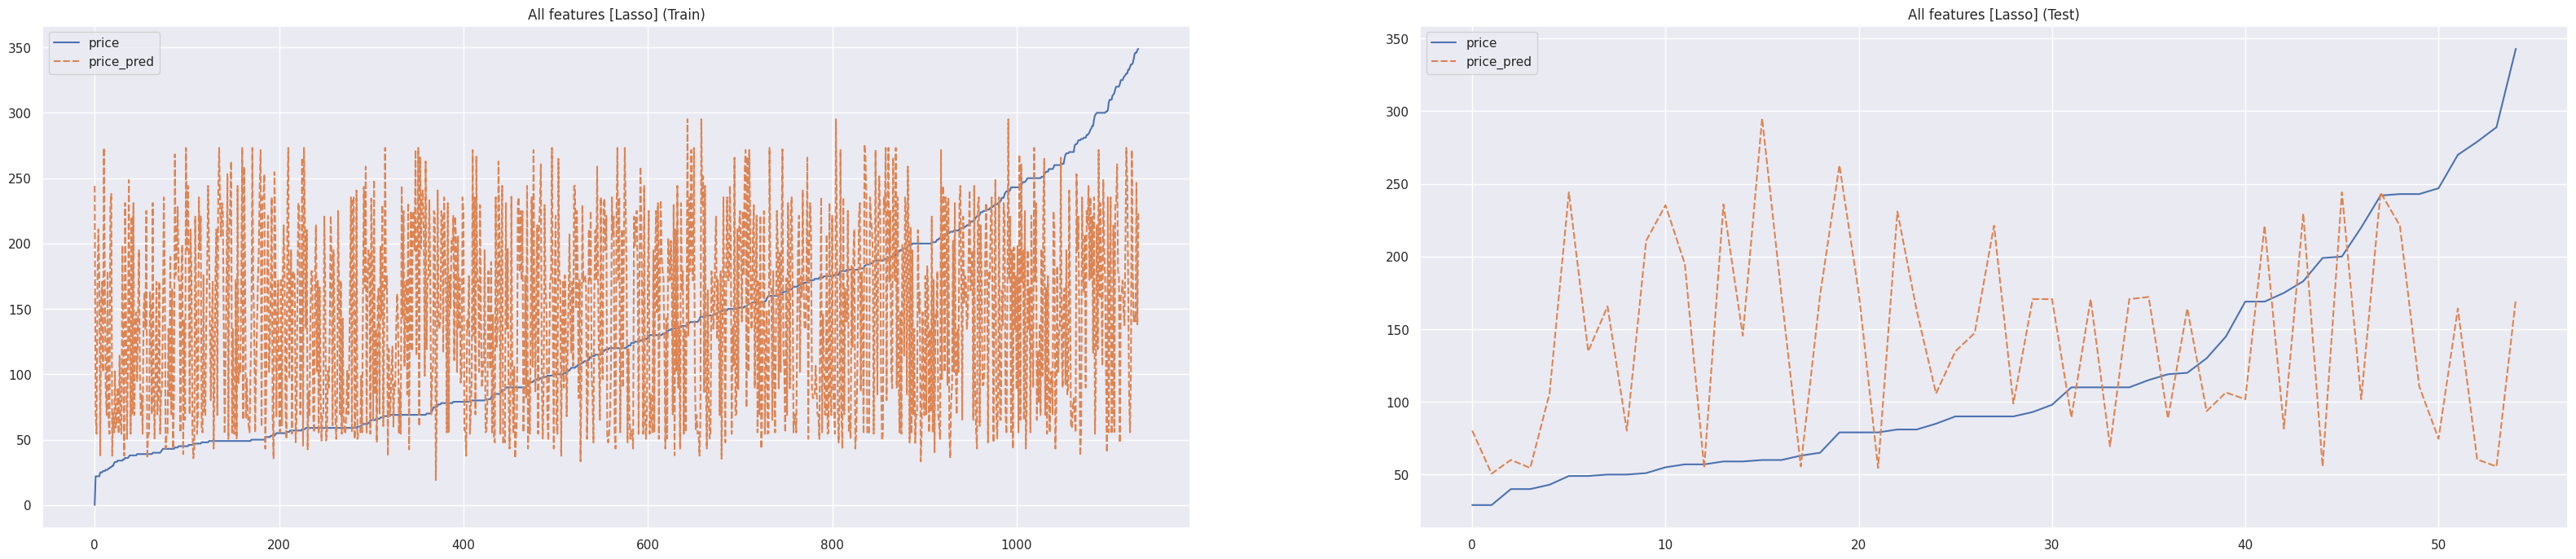

In [2176]:
#Extract response and predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe.drop(numerical_variables, axis=1))

y_train, y_train_pred, y_test, y_test_pred = xgboost(X,y,"All features")